<div style="border: 3px solid #010101; background-color: #ffffff; color: #101010; padding: 10px; font-size: 24px; text-align: center;">
    House Price Prediction with Linear Regression, Random Forest and XGBoost
</div>


# Project Pipeline

✨ Data Cleaning – Handling missing values and outliers

🔧 Data Preprocessing – Label encoding, feature selection, train-test split

📊 EDA – Exploratory Data Analysis

🐾 Feature Engineering – Categorical encoding, scaling, feature selection

📈 Machine Learning – Linear Regression, XGBoost, Random Forest

🎯 Hyperparameter Tuning – GridSearchCV used for model optimization

📊 Model Evaluation – RMSE, MAE, R² score

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-price-prediction-dataset/data_description.txt
/kaggle/input/house-price-prediction-dataset/train.csv
/kaggle/input/house-price-prediction-dataset/test.csv


# 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 2. Loading Data

In [3]:
train = pd.read_csv("/kaggle/input/house-price-prediction-dataset/train.csv")
test = pd.read_csv("/kaggle/input/house-price-prediction-dataset/test.csv")

df = pd.concat([train, test], axis=0, ignore_index=True)

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [5]:
df.shape

(2919, 81)

In [6]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [7]:
df["Street"].value_counts()

Street
Pave    2907
Grvl      12
Name: count, dtype: int64

In [8]:
df["LotShape"].value_counts()

LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64

In [9]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [10]:
df["PoolQC"].value_counts()

PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64

In [11]:
df["Fence"].value_counts()

Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64

In [12]:
df["MiscFeature"].value_counts()

MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000  ...   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235  ...   
std       1.113131    30.291442     20.894344   179.334253   455.610826  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000   
mean     93.709832    47.486811      23.098321     2.602261    16.062350   
std     126.526589    67.575493      64.244246    25.188169    56.184365   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    26.000000       0.000000     0.000000     0.000000   
75%     168.000000    70.000000       0.000000     0.000000     0.000000   
max    1424.000000   742.000000    1012.000000   508.000000   576.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  2919.000000   2919.000000  2919.000000  2919.000000    1460.000000  
mean      2.251799     50.825968     6.213087  2007.792737  180921.195890  
std      35.663946    567.402211     2.714762     1.314964   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     4.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     800.000000  17000.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [15]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

# 3. Handling NaN/Null values

In [16]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [17]:
import pandas as pd

def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            mean_value = df[column].median()
            df[column].fillna(mean_value, inplace=True)
        else:
            mode_value = df[column].mode()
            if not mode_value.empty:
                df[column].fillna(mode_value[0], inplace=True)
    return df

In [18]:
df = handle_missing_values(df)

/tmp/ipykernel_31/3467478909.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)
/tmp/ipykernel_31/3467478909.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [19]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Ex  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal   208500.0  
1      5   2007        WD         Normal   181500.0  
2      9   2008        WD         Normal   223500.0  
3      2   2006        WD        Abnorml   140000.0  
4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [20]:
df.shape

(2919, 81)

In [21]:
columns = df.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Exploartory Data Analysis

## Finding outliers

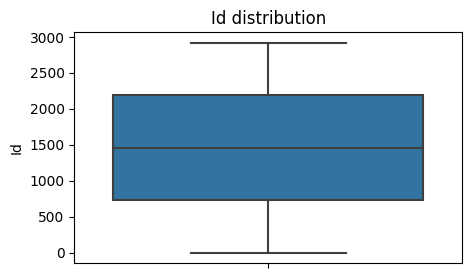

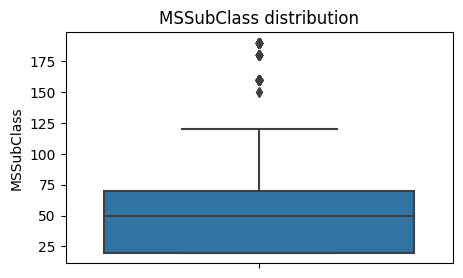

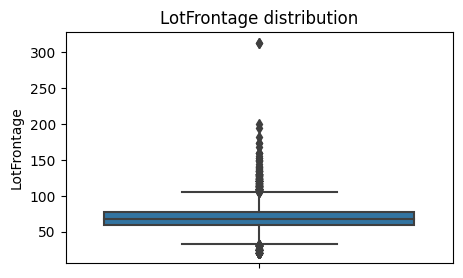

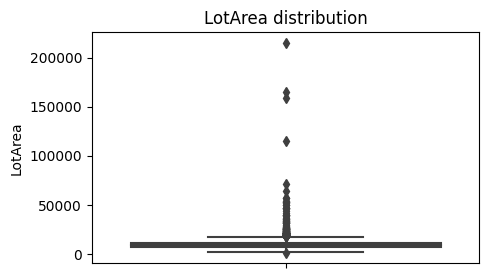

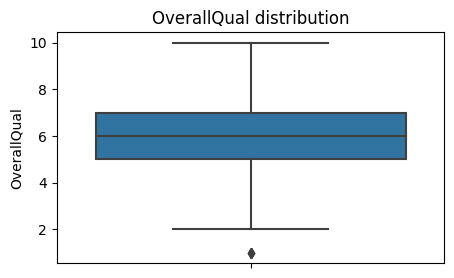

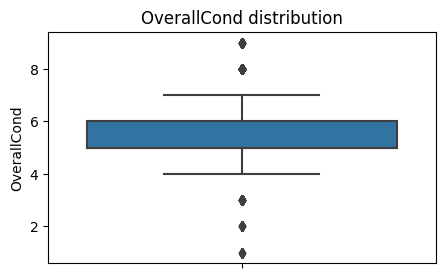

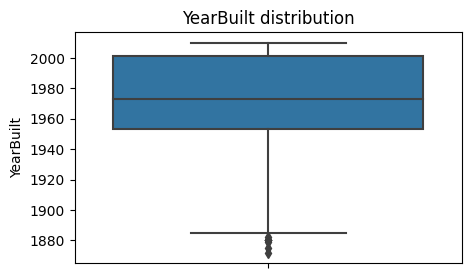

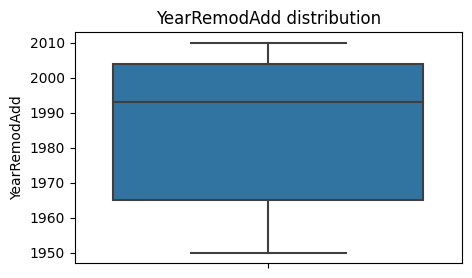

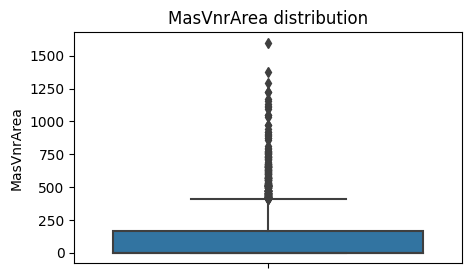

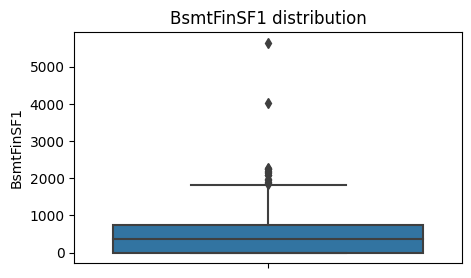

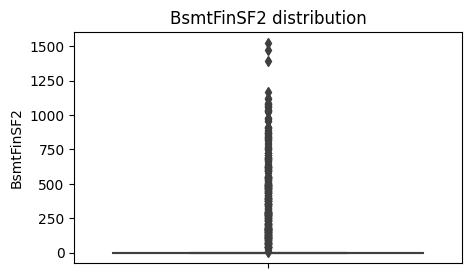

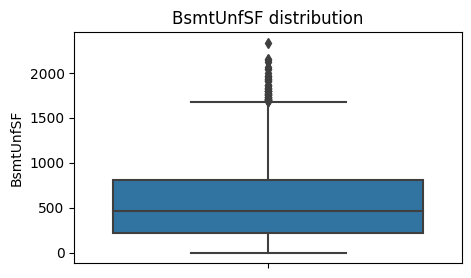

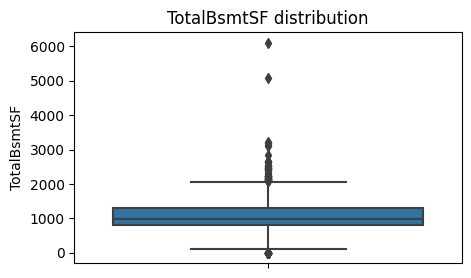

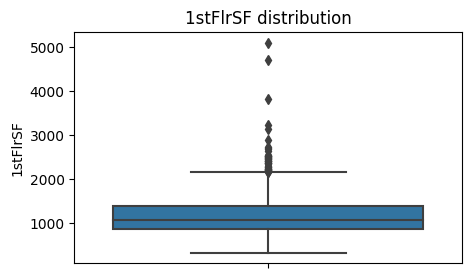

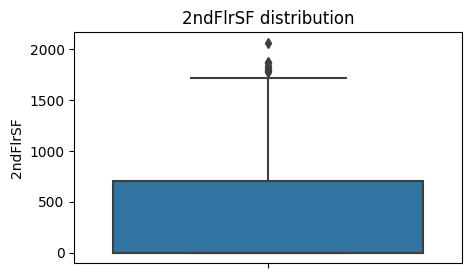

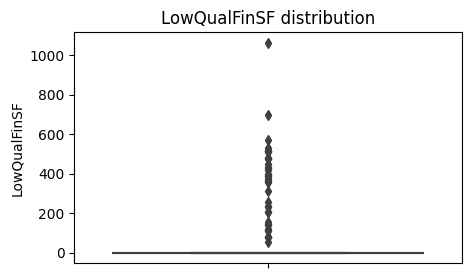

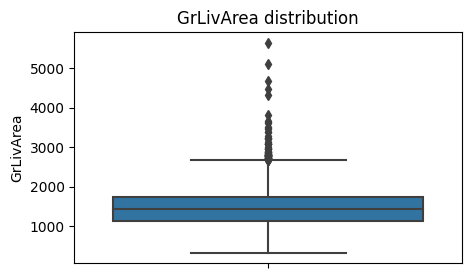

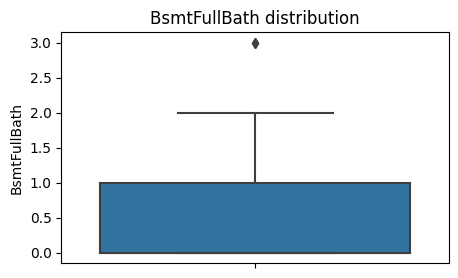

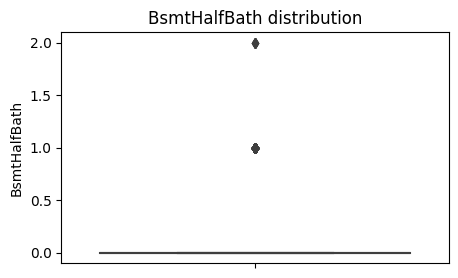

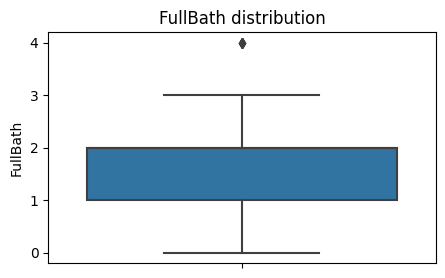

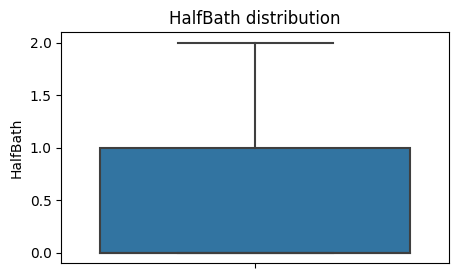

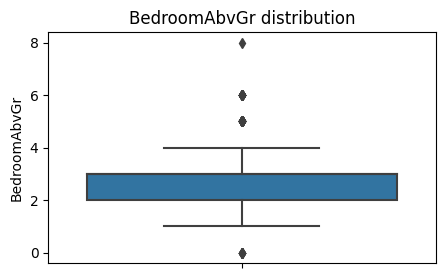

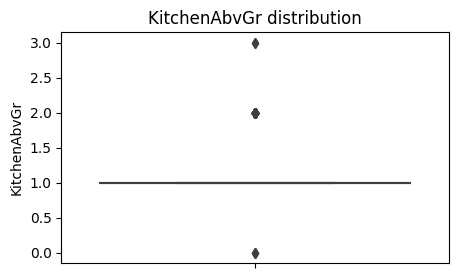

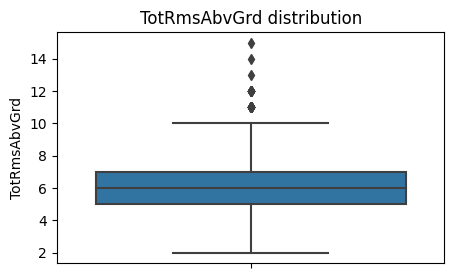

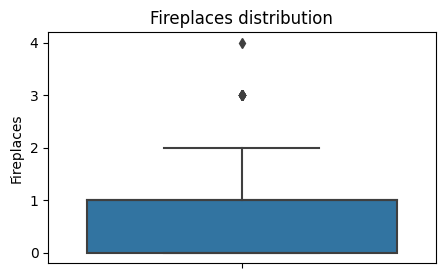

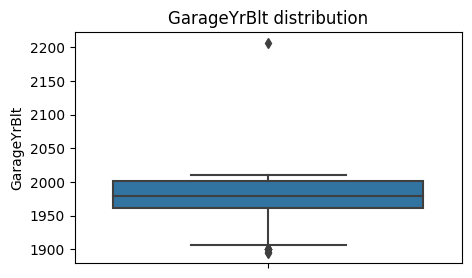

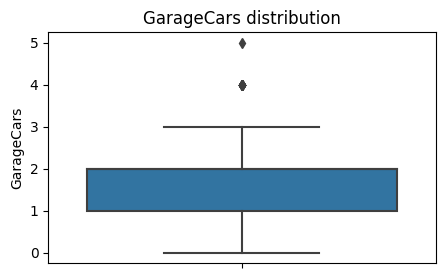

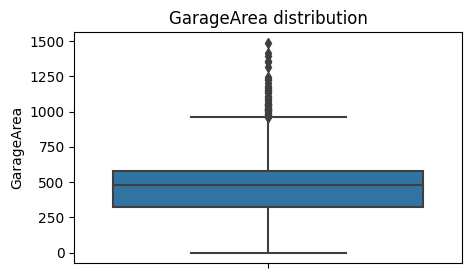

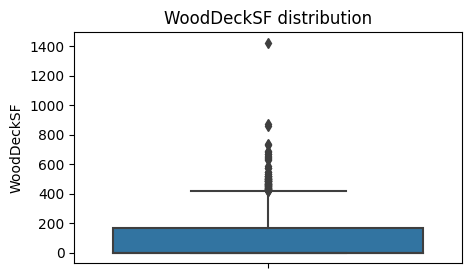

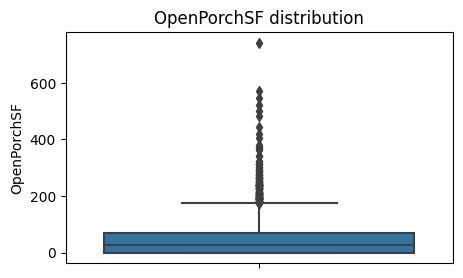

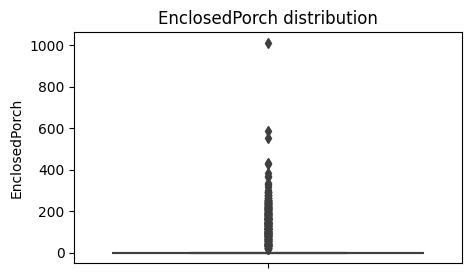

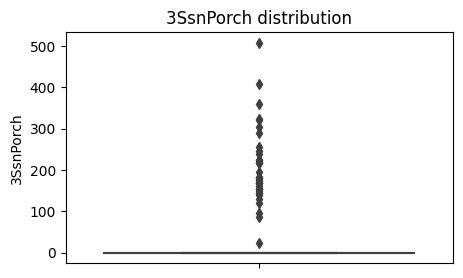

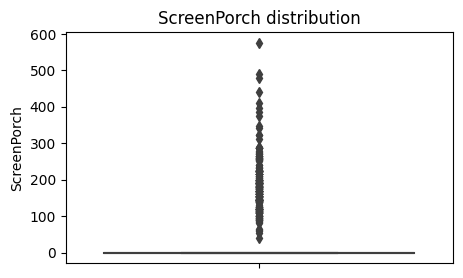

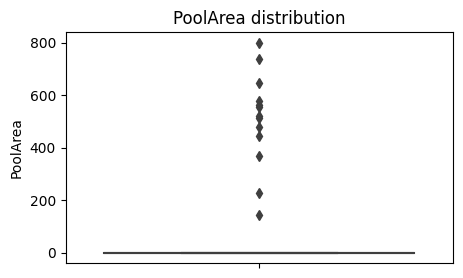

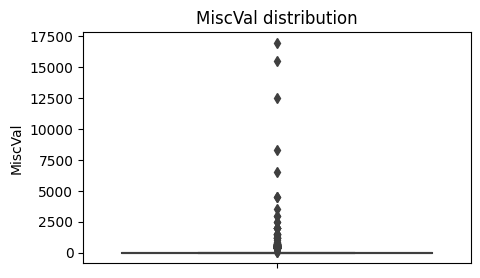

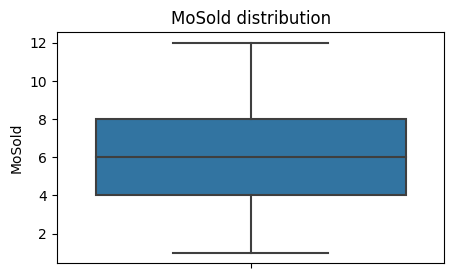

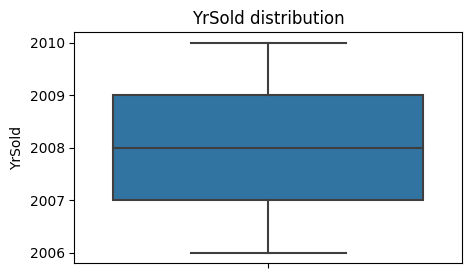

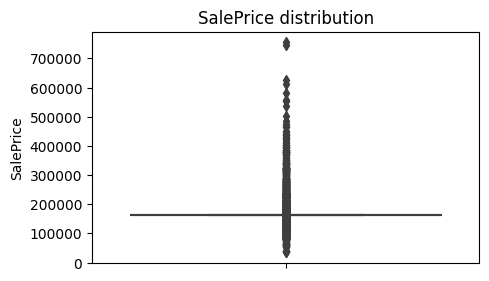

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

def outlier_graph(column):
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column])  # use y= for one-dimensional boxplot
    plt.title(f'{column} distribution')
    plt.show()

for col in numeric_columns:
    outlier_graph(col)

## Removing outliers

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


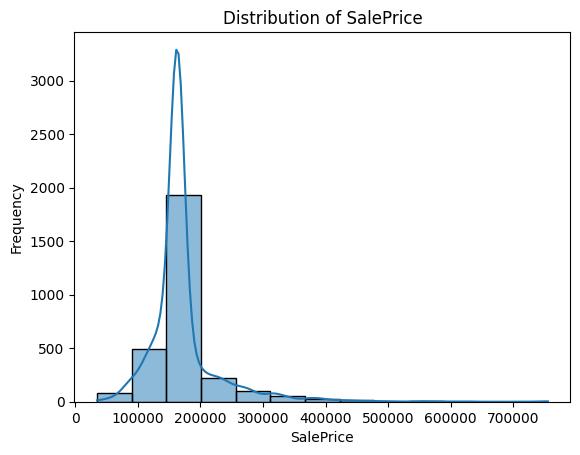

In [23]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Data Visualization

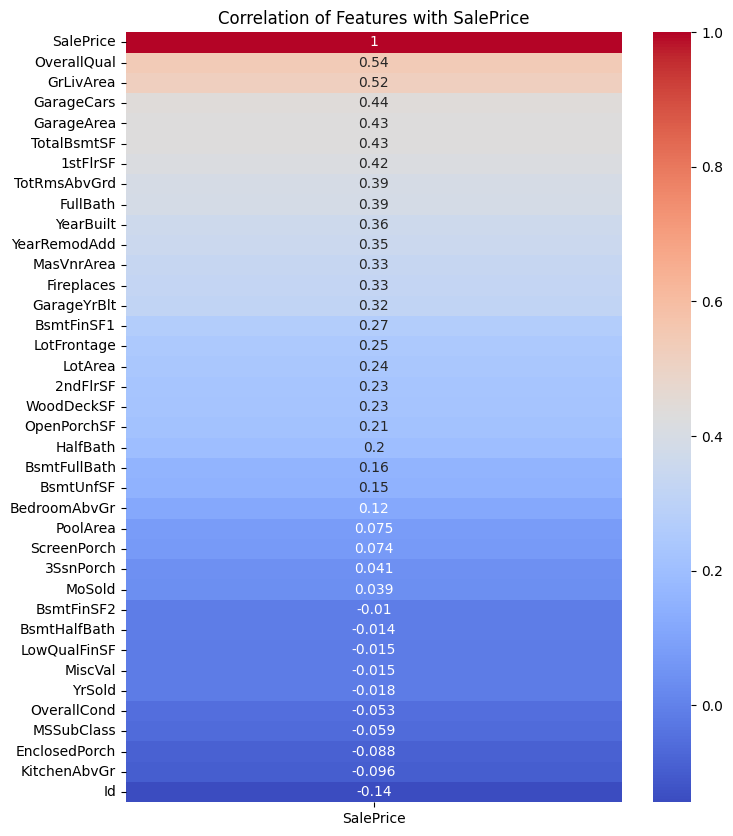

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation with target only
correlation = df.select_dtypes(include=['int64', 'float64']).corr()
target_corr = correlation['SalePrice'].sort_values(ascending=False)

# Plot top correlated features
plt.figure(figsize=(8, 10))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with SalePrice")
plt.show()

# 5. Converting Non-Numeric (Object) Columns to Numeric 

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [26]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      0         3   
1   2          20         3         80.0     9600       1      0         3   
2   3          60         3         68.0    11250       1      0         0   
3   4          70         3         60.0     9550       1      0         0   
4   5          60         3         84.0    14260       1      0         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       0      2            2        0   
1            3          0  ...         0       0      2            2        0   
2            3          0  ...         0       0      2            2        0   
3            3          0  ...         0       0      2            2        0   
4            3          0  ...         0       0      2            2        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008         8              4   208500.0  
1       5    2007         8              4   181500.0  
2       9    2008         8              4   223500.0  
3       2    2006         8              0   140000.0  
4      12    2008         8              4   250000.0  

[5 rows x 81 columns]

# 6. Separating features and target columns

In [27]:
x = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']

# 7. Scaling the data

In [28]:
scaler = StandardScaler()

In [29]:
x_scaler = scaler.fit_transform(x)

In [30]:
x_scaler_frame=pd.DataFrame(x_scaler,columns=x.columns)
x_scaler_frame.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  \
0 -1.731458    0.067331 -0.042157    -0.191815 -0.217879  0.064249 -0.165696   
1 -1.730271   -0.873616 -0.042157     0.511940 -0.072044  0.064249 -0.165696   
2 -1.729084    0.067331 -0.042157    -0.051064  0.137197  0.064249 -0.165696   
3 -1.727897    0.302568 -0.042157    -0.426400 -0.078385  0.064249 -0.165696   
4 -1.726711    0.067331 -0.042157     0.699608  0.518903  0.064249 -0.165696   

   LotShape  LandContour  Utilities  ...  ScreenPorch  PoolArea    PoolQC  \
0  0.746669     0.316671  -0.018512  ...    -0.285935  -0.06315 -0.043668   
1  0.746669     0.316671  -0.018512  ...    -0.285935  -0.06315 -0.043668   
2 -1.381776     0.316671  -0.018512  ...    -0.285935  -0.06315 -0.043668   
3 -1.381776     0.316671  -0.018512  ...    -0.285935  -0.06315 -0.043668   
4 -1.381776     0.316671  -0.018512  ...    -0.285935  -0.06315 -0.043668   

      Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  \
0  0.263432     0.048179 -0.089592 -1.552184  0.157646  0.319311   
1  0.263432     0.048179 -0.089592 -0.446925 -0.602962  0.319311   
2  0.263432     0.048179 -0.089592  1.026753  0.157646  0.319311   
3  0.263432     0.048179 -0.089592 -1.552184 -1.363569  0.319311   
4  0.263432     0.048179 -0.089592  2.132012  0.157646  0.319311   

   SaleCondition  
0       0.204967  
1       0.204967  
2       0.204967  
3      -3.505415  
4       0.204967  

[5 rows x 80 columns]

## Checking before scaling and after scaling data

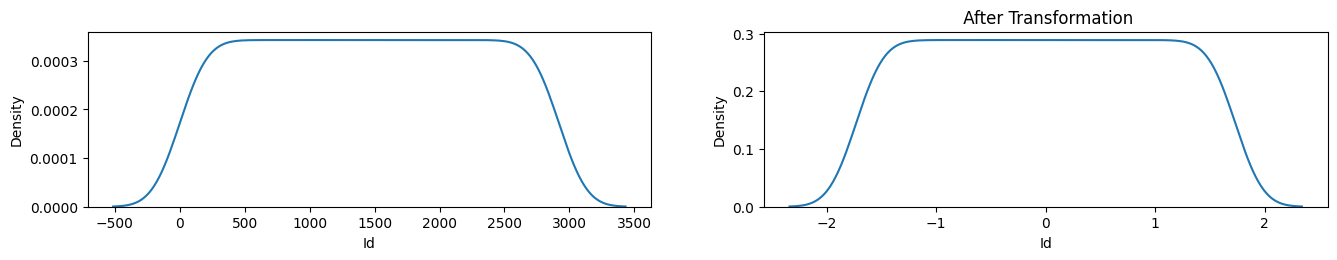

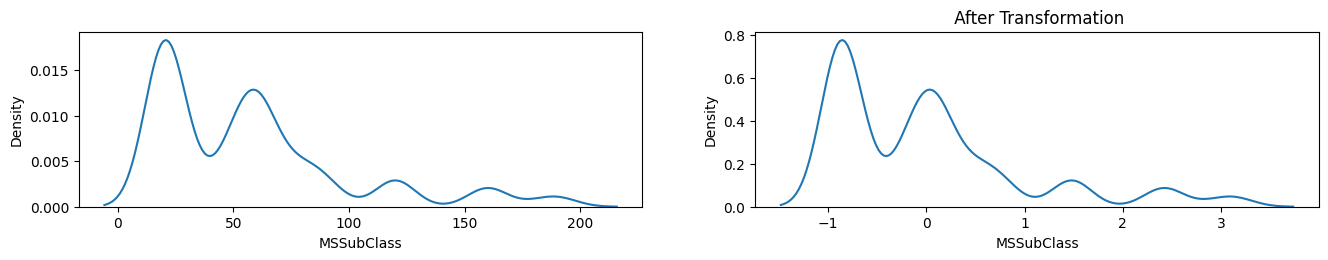

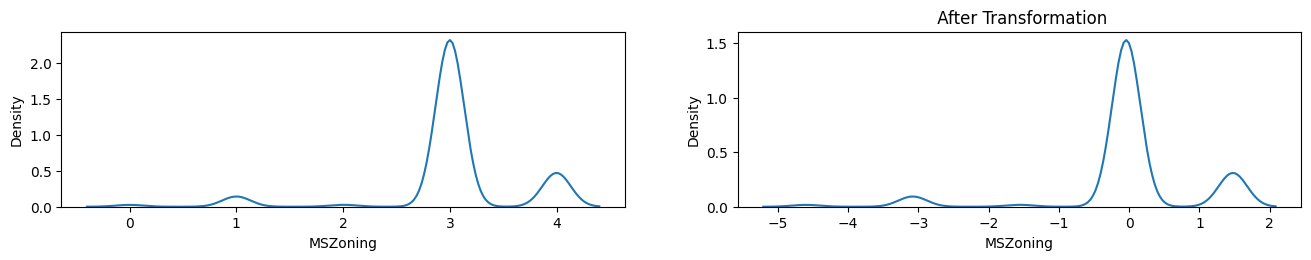

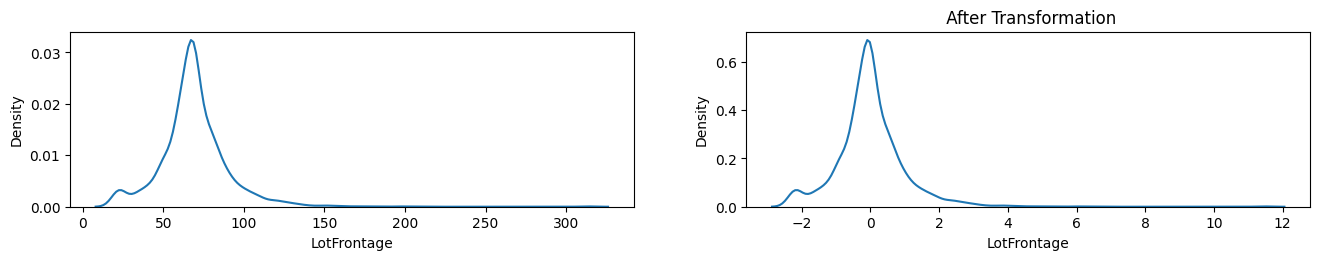

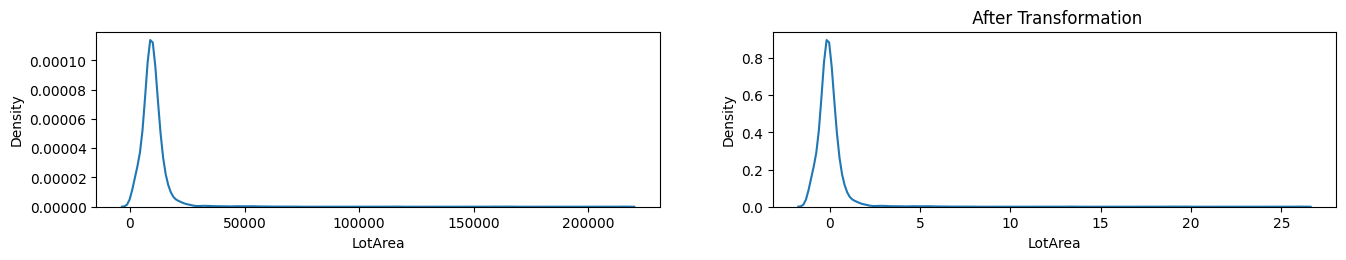

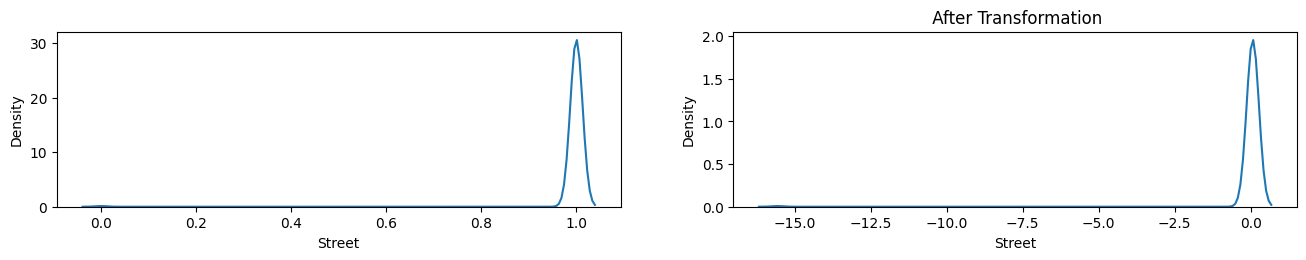

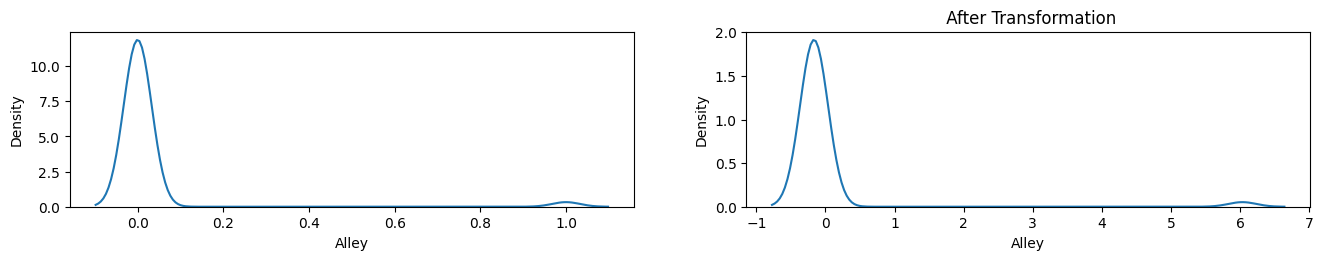

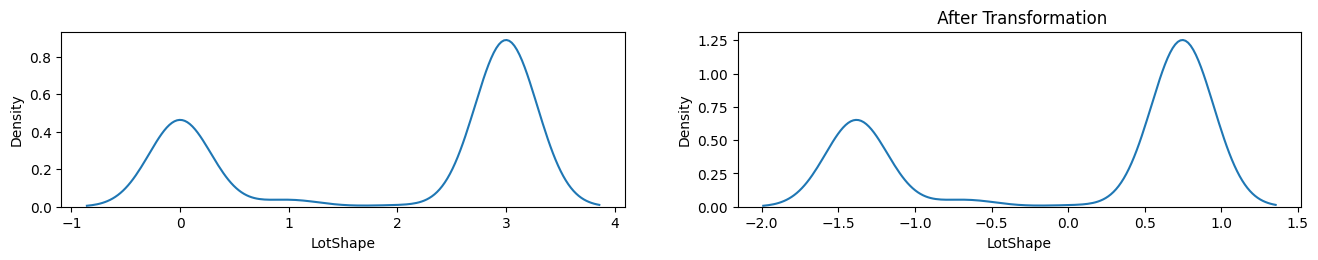

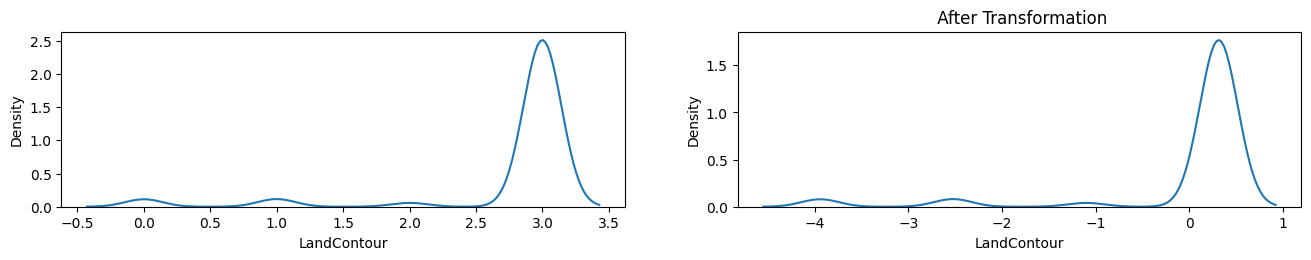

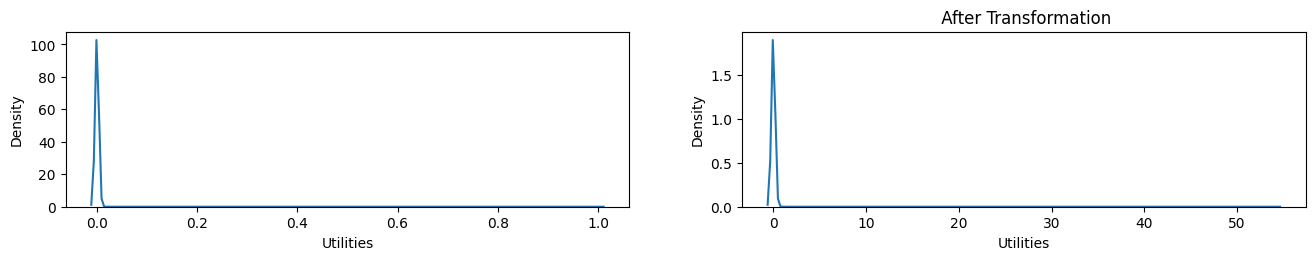

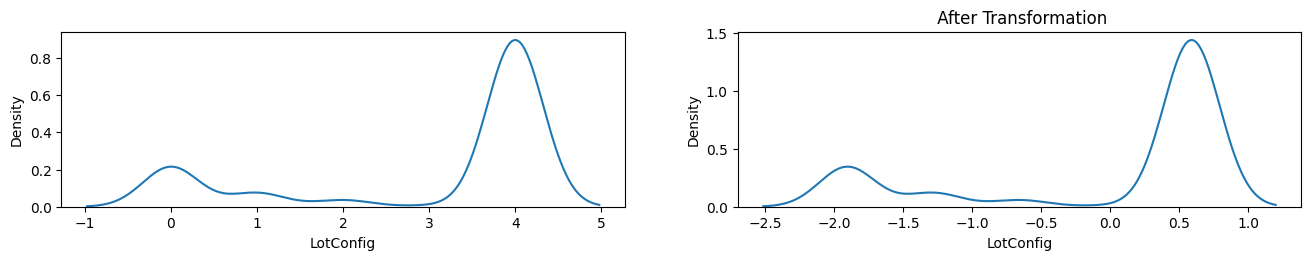

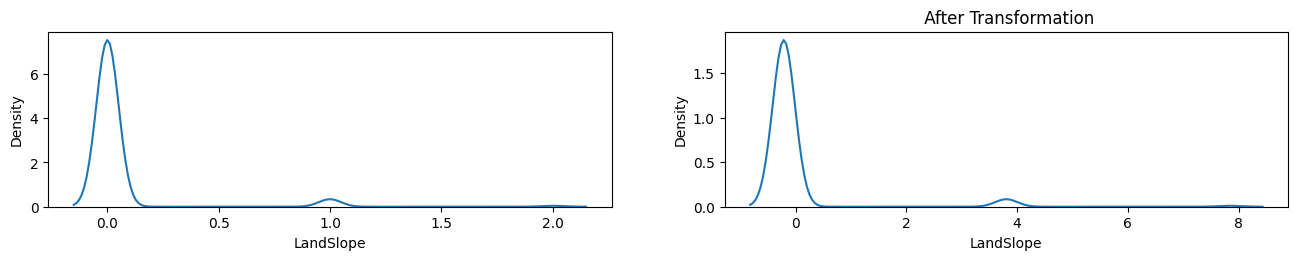

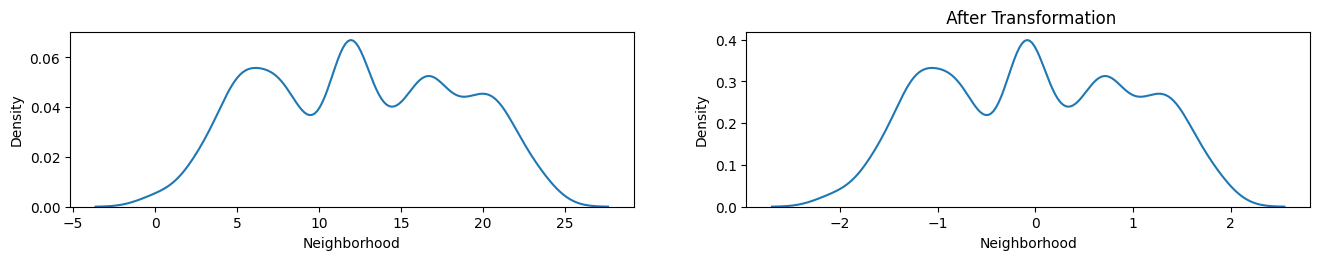

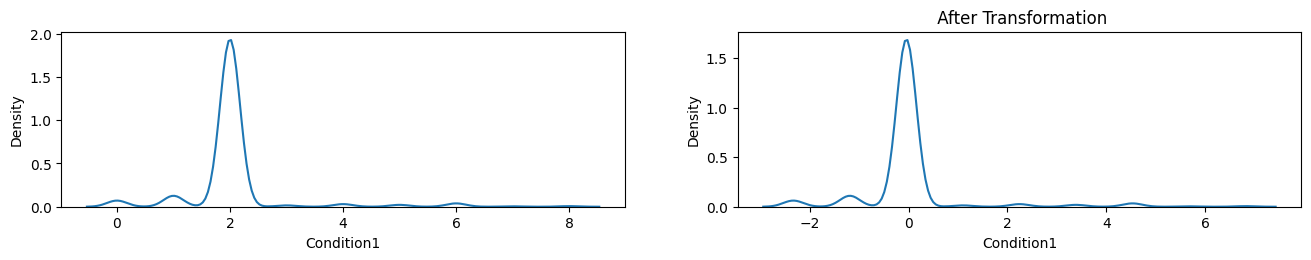

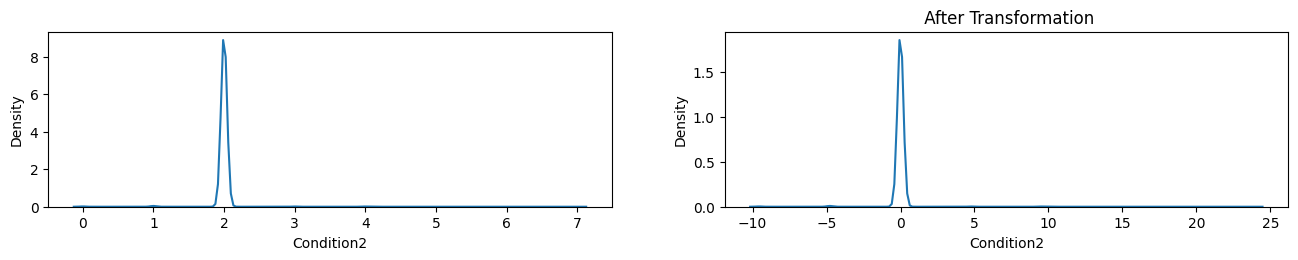

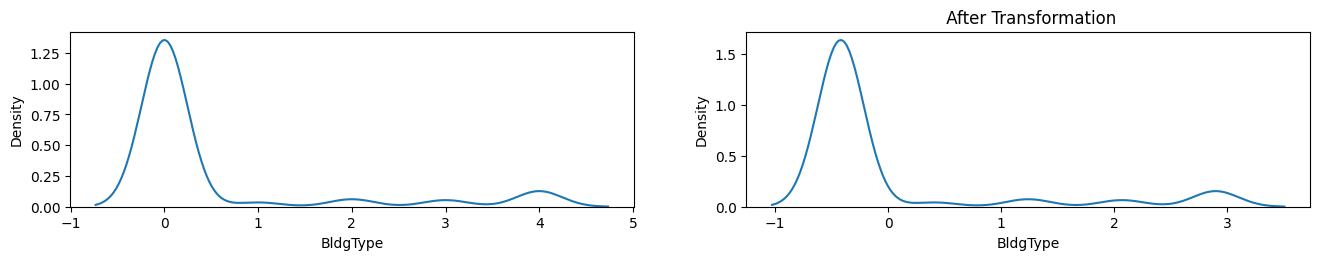

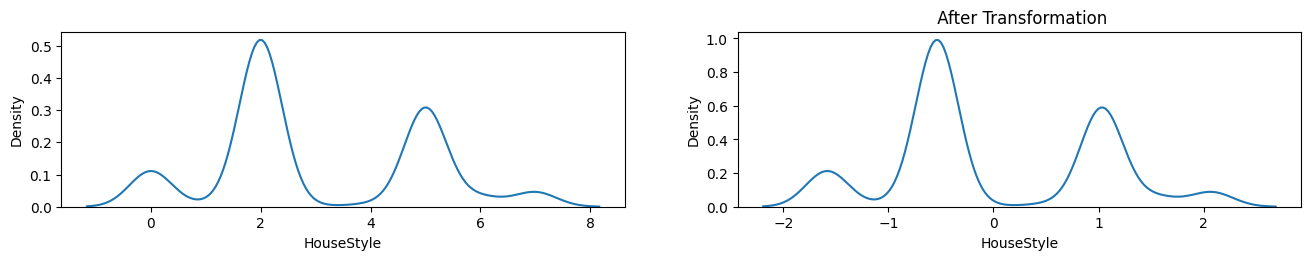

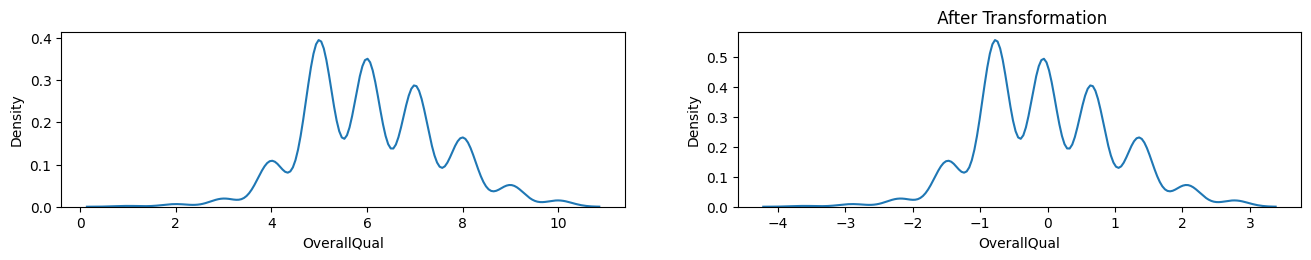

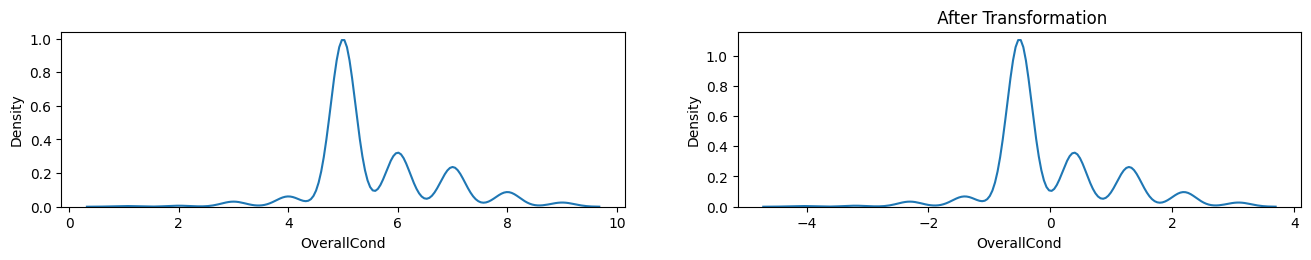

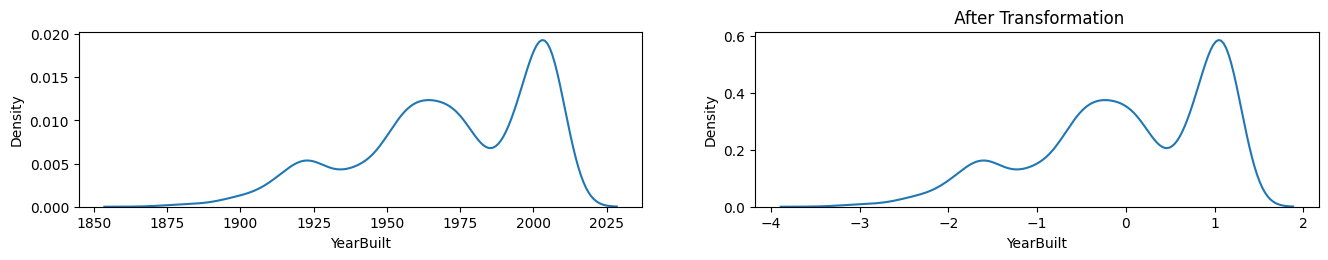

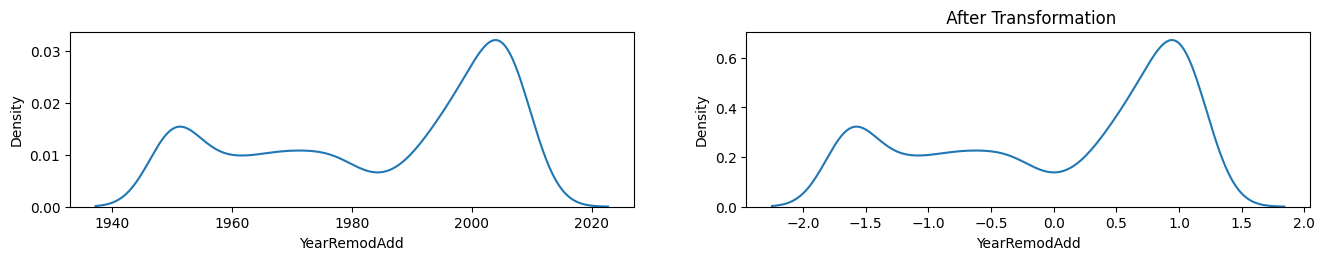

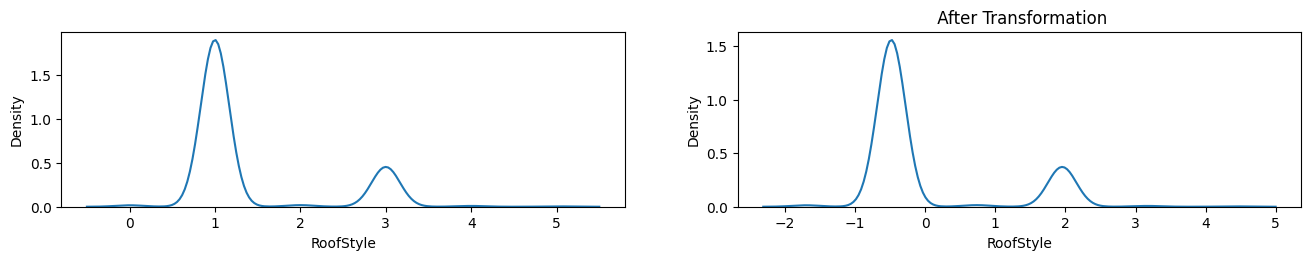

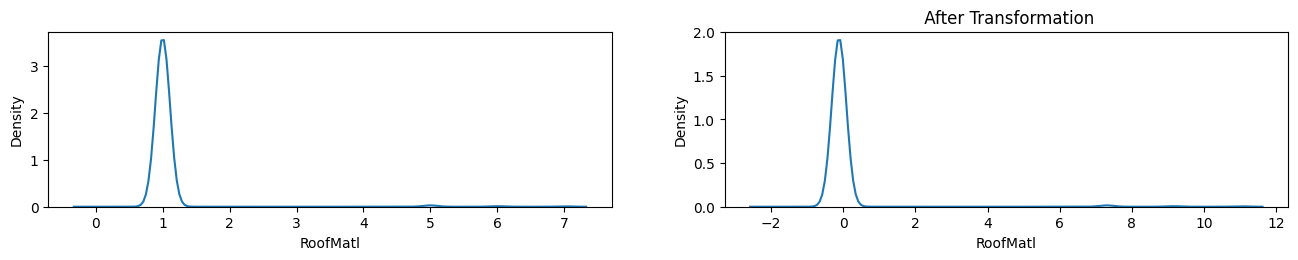

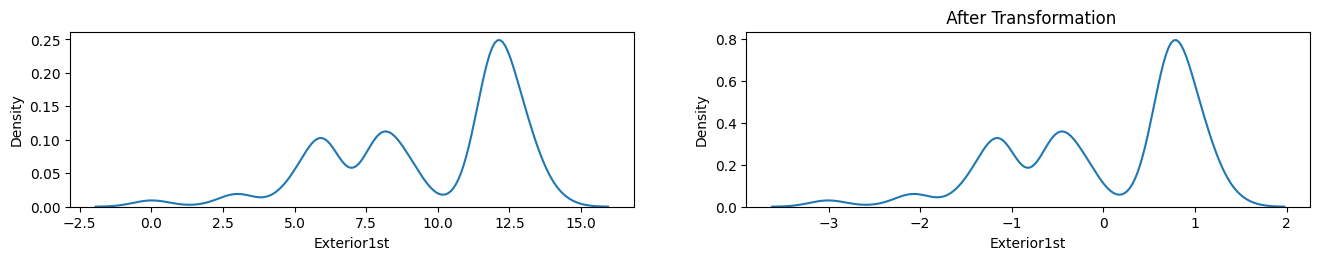

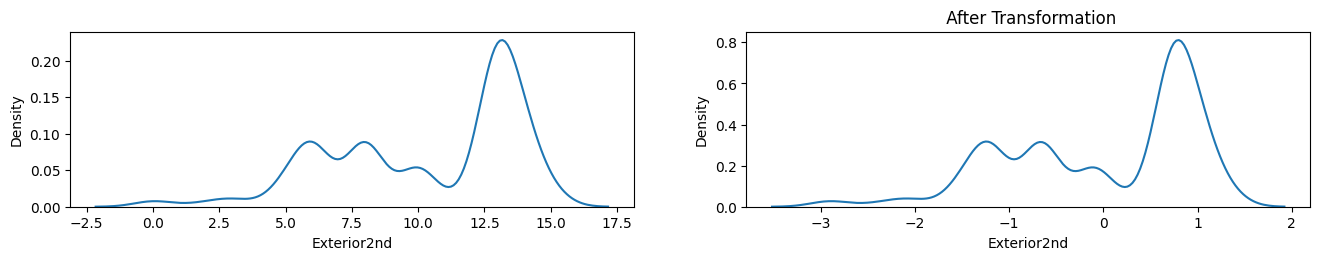

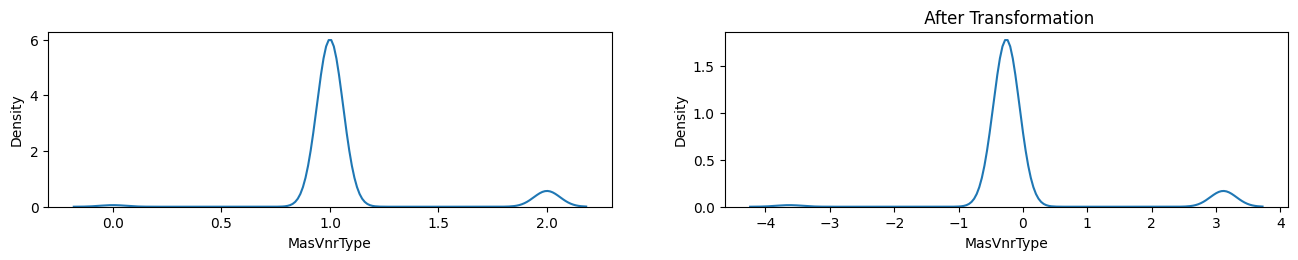

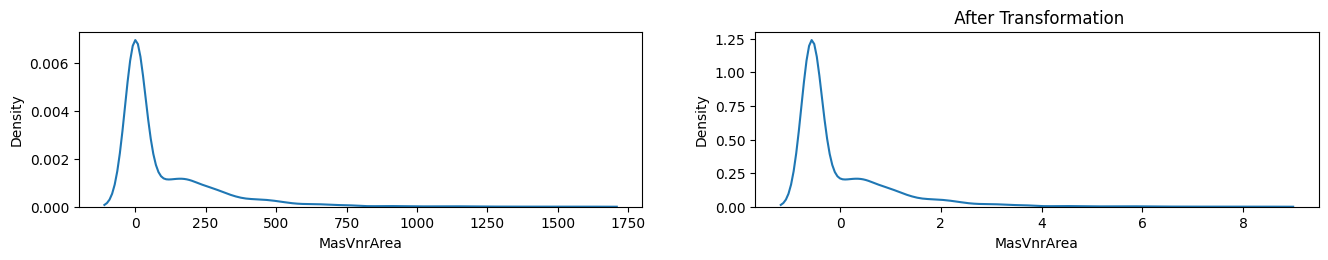

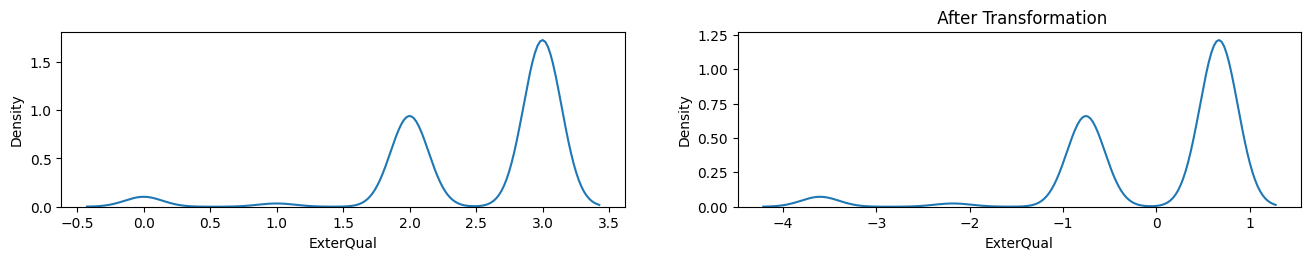

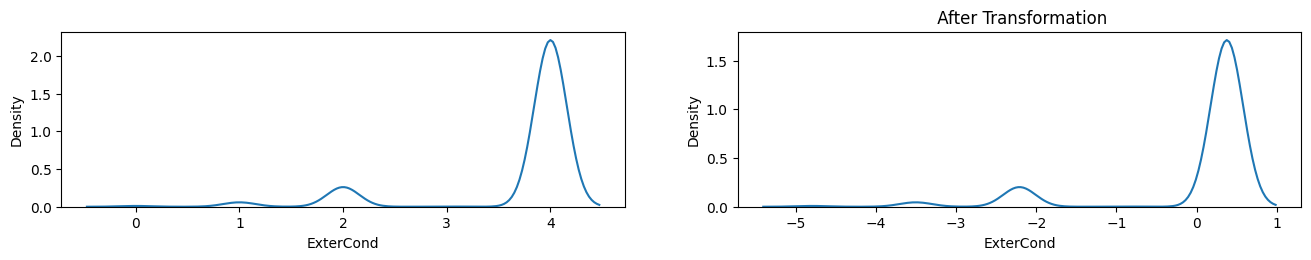

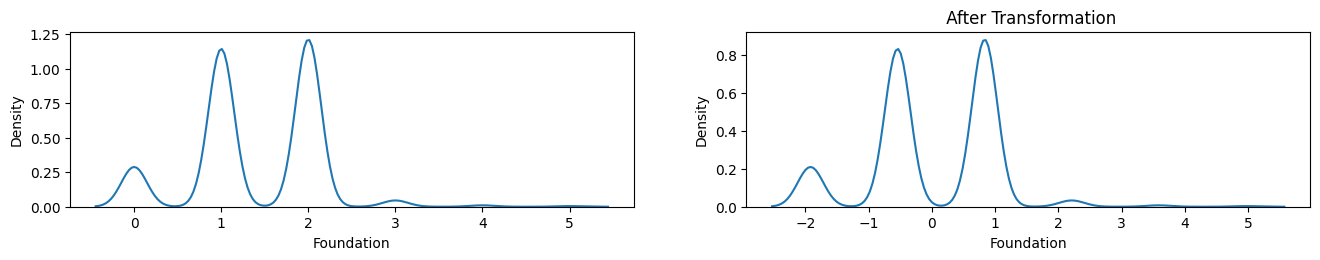

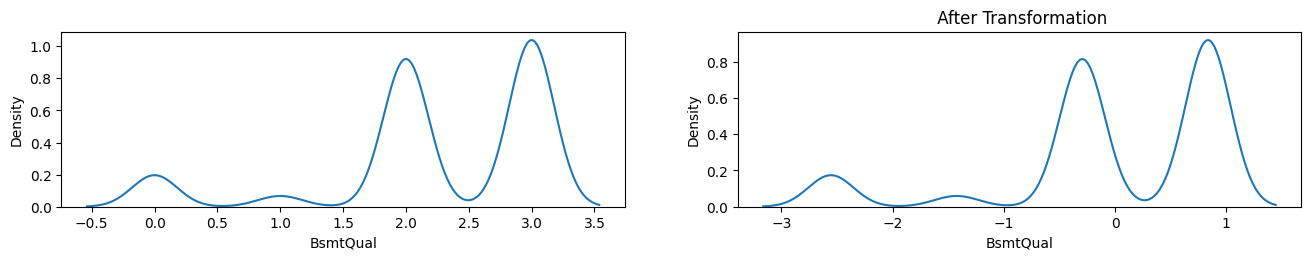

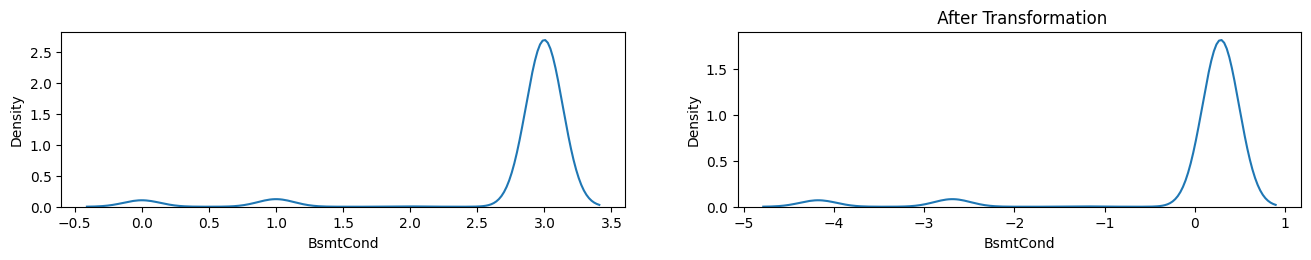

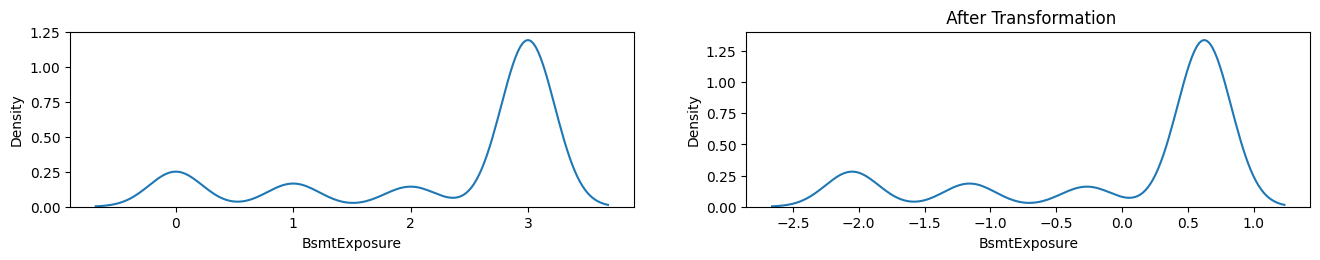

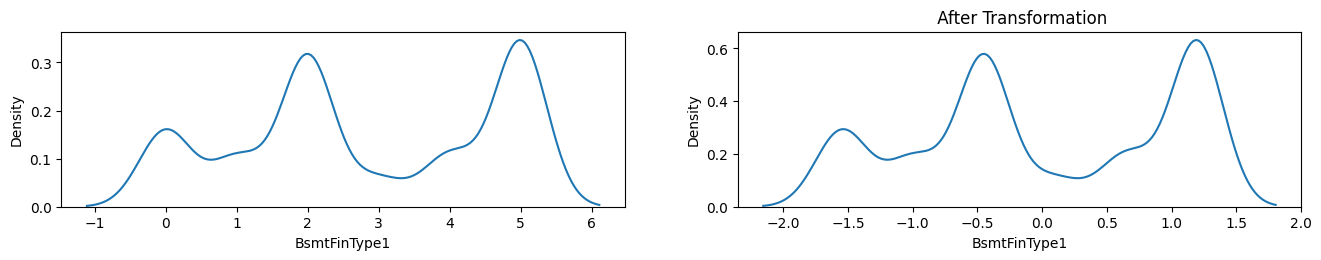

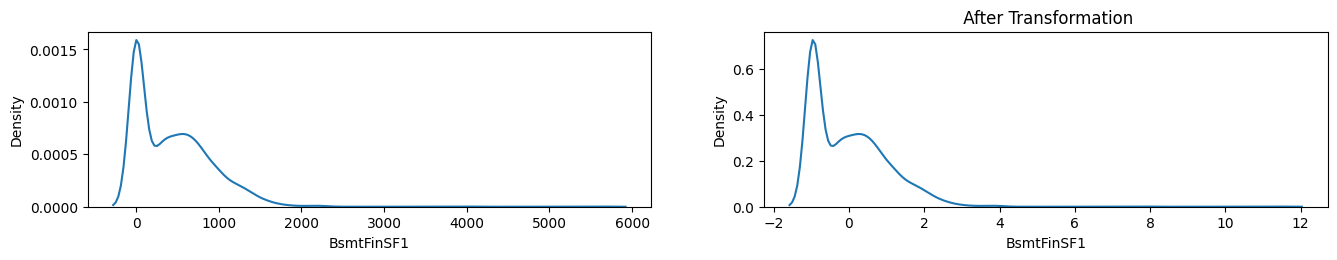

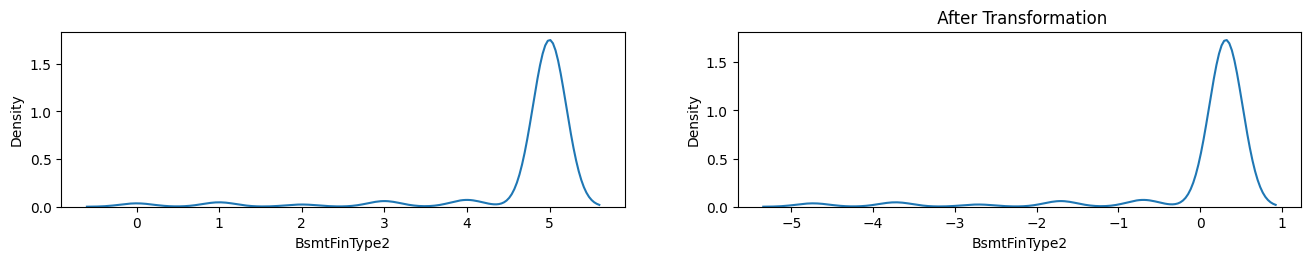

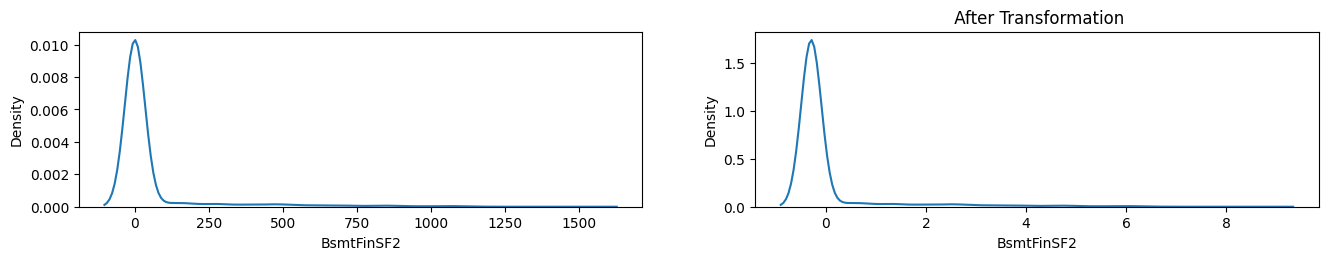

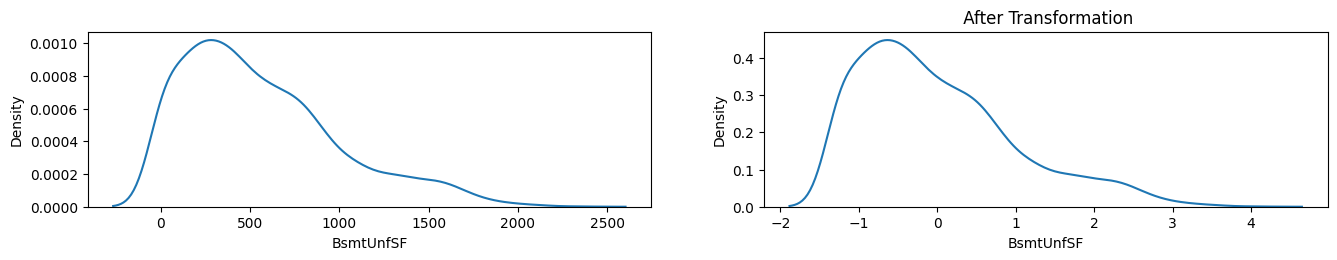

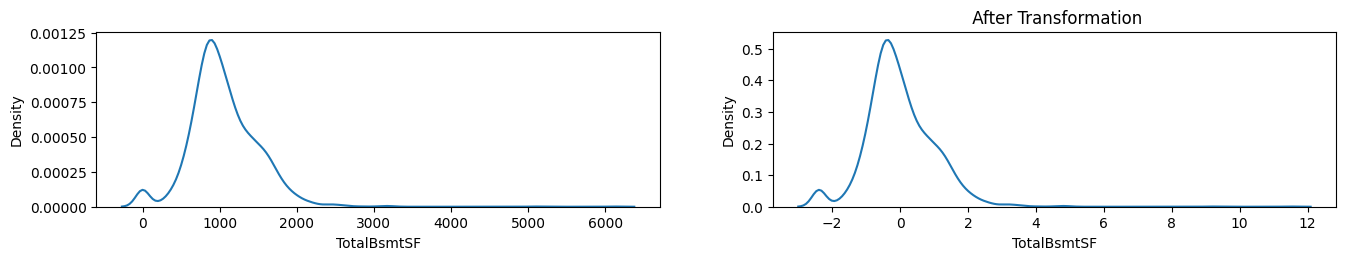

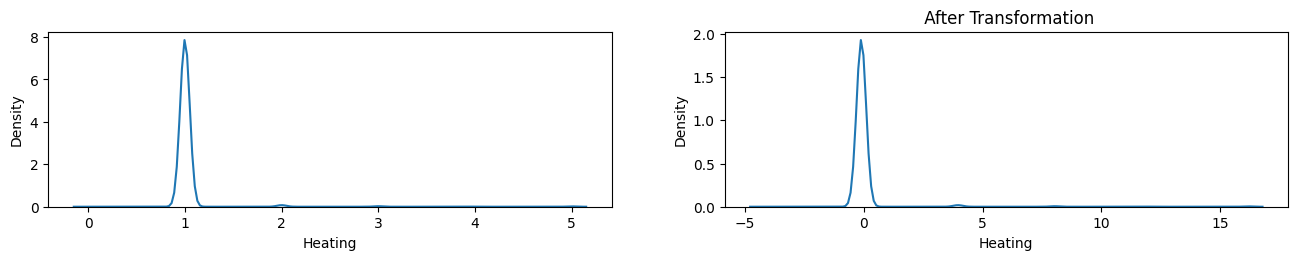

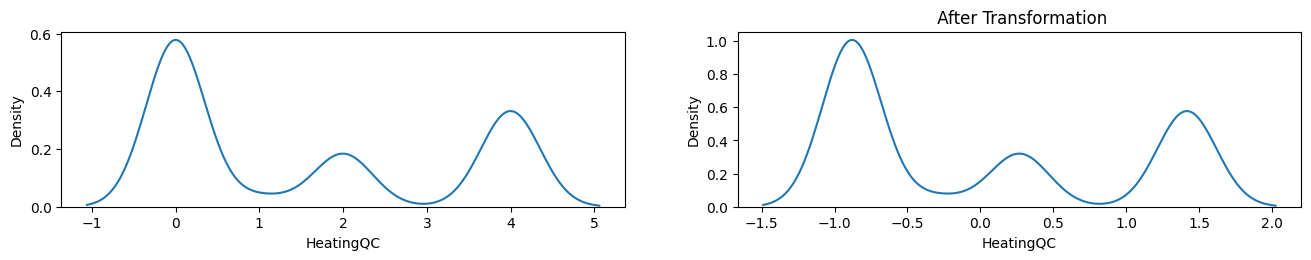

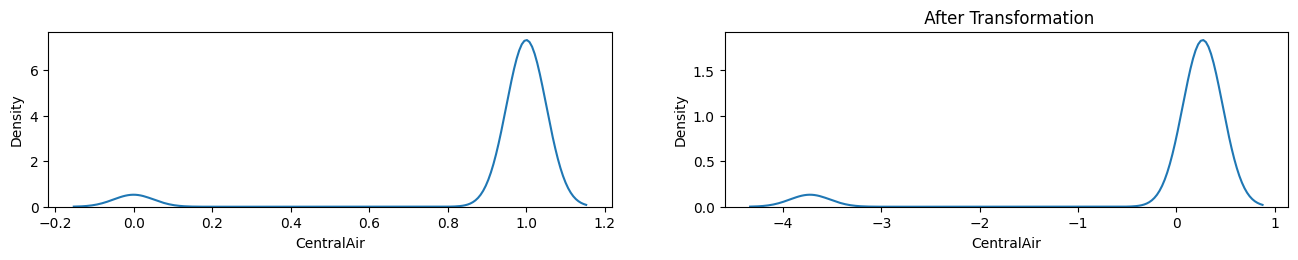

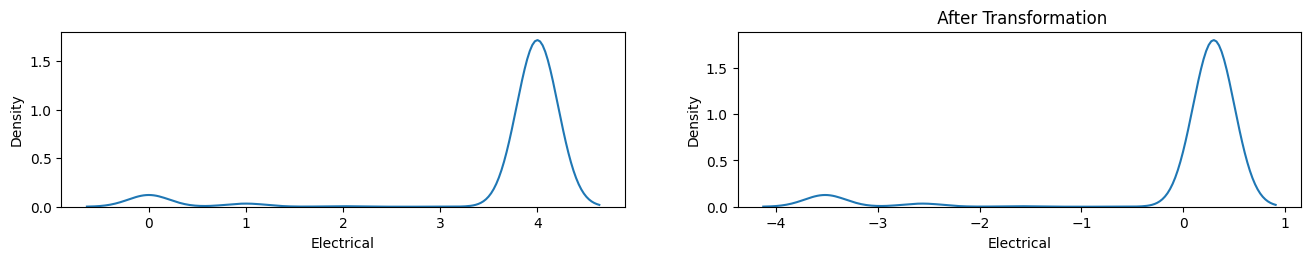

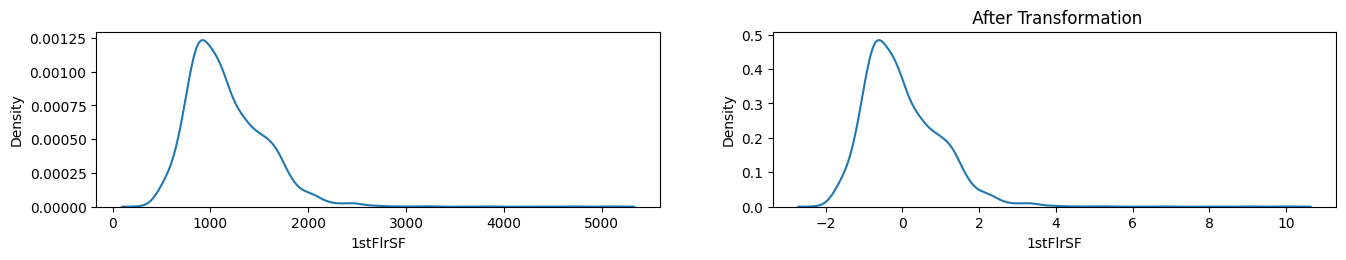

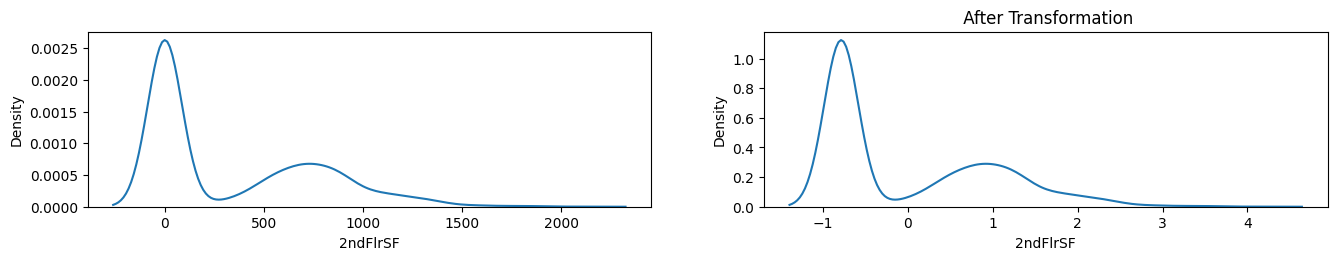

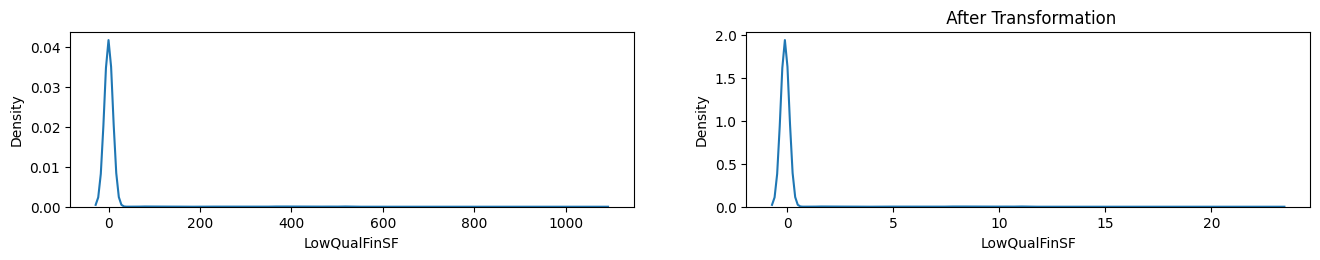

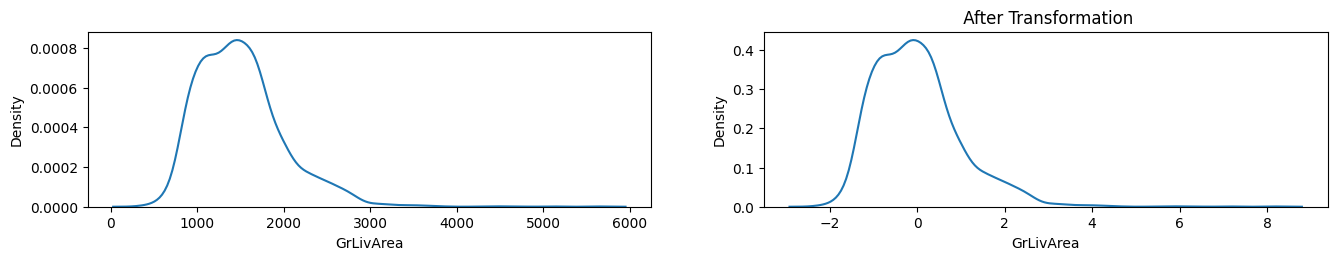

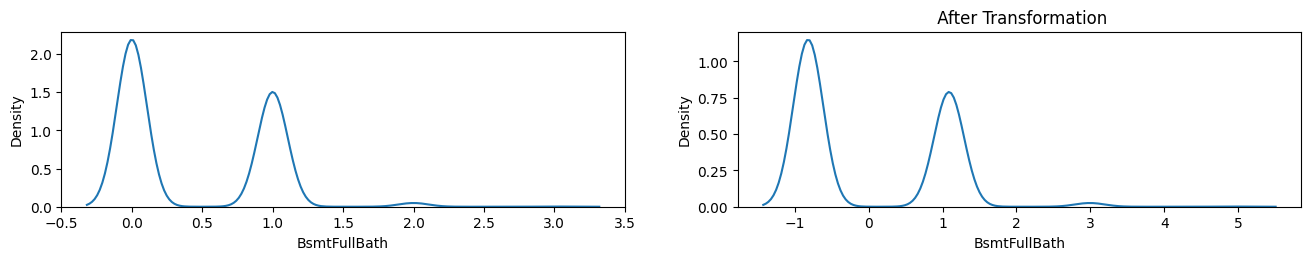

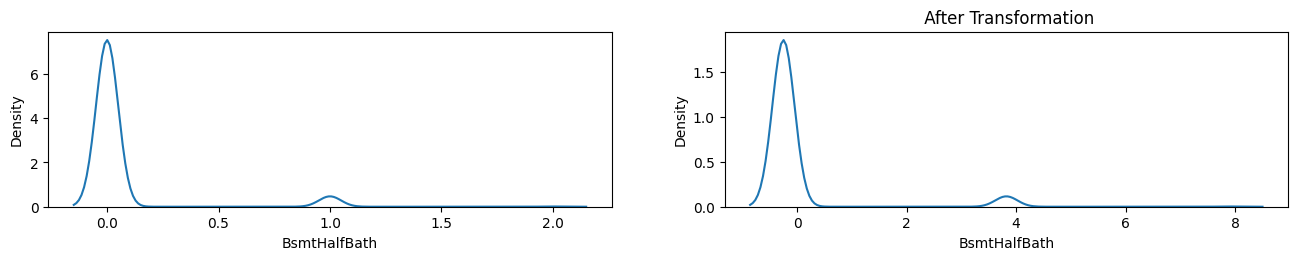

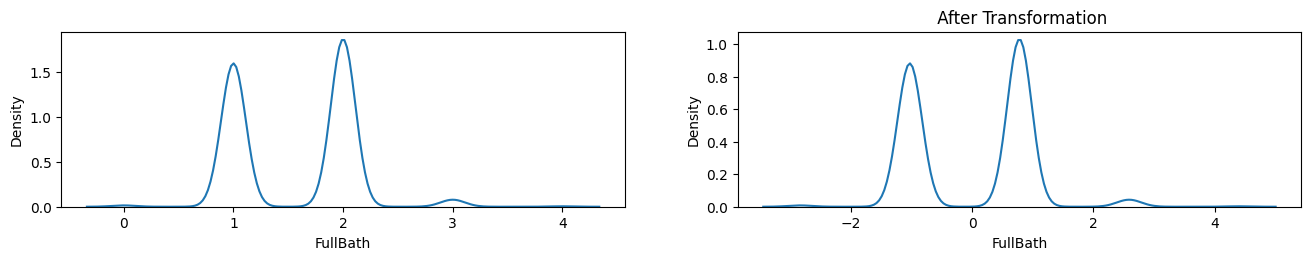

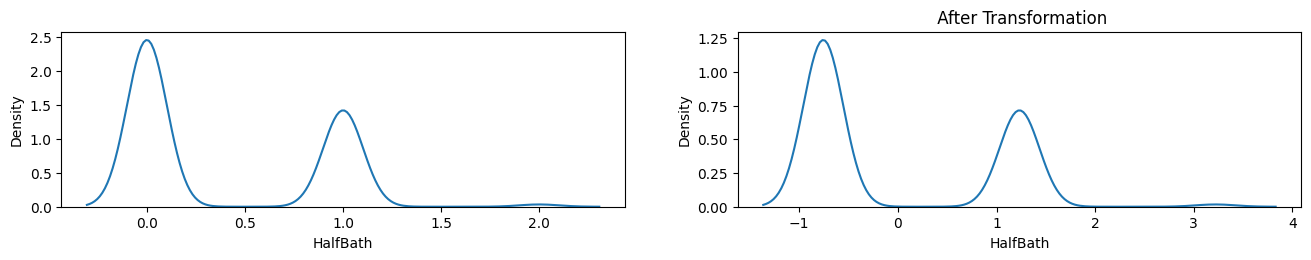

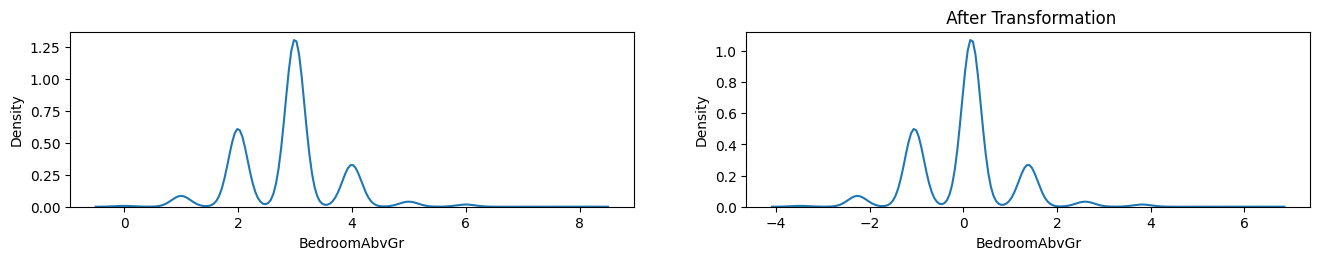

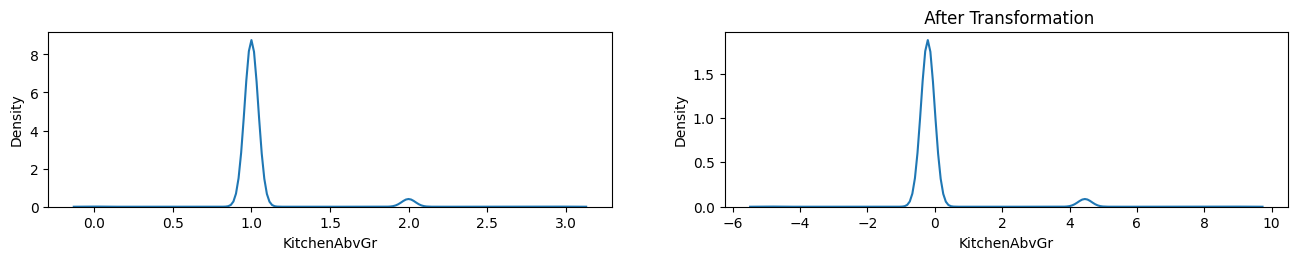

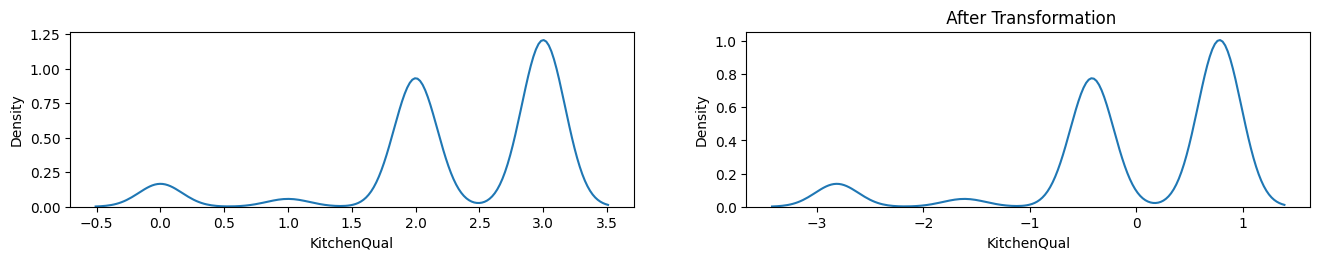

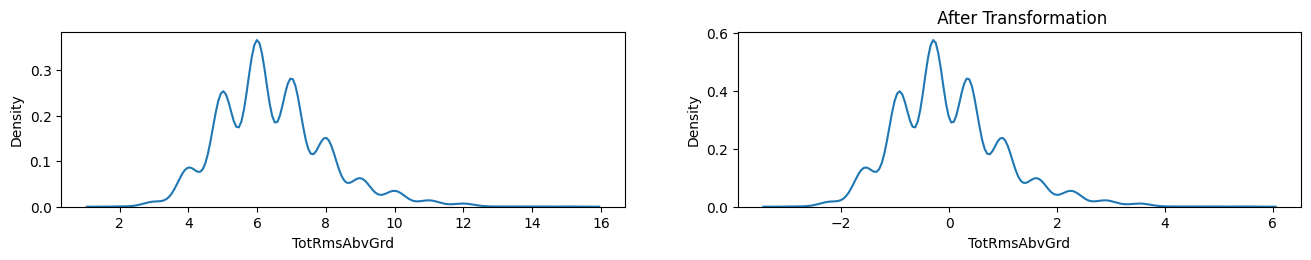

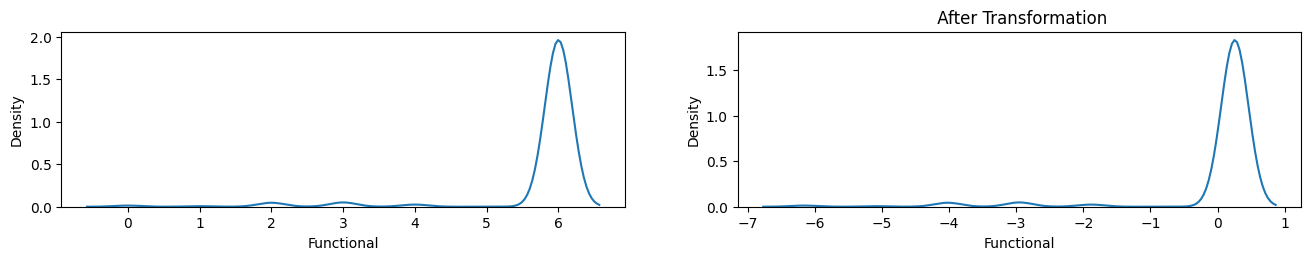

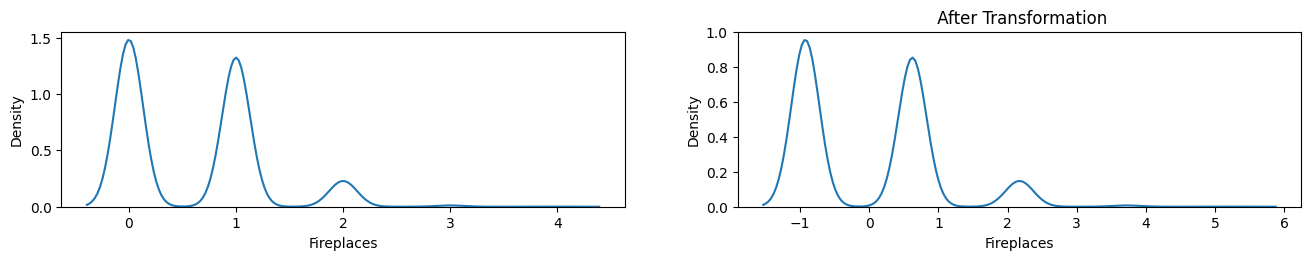

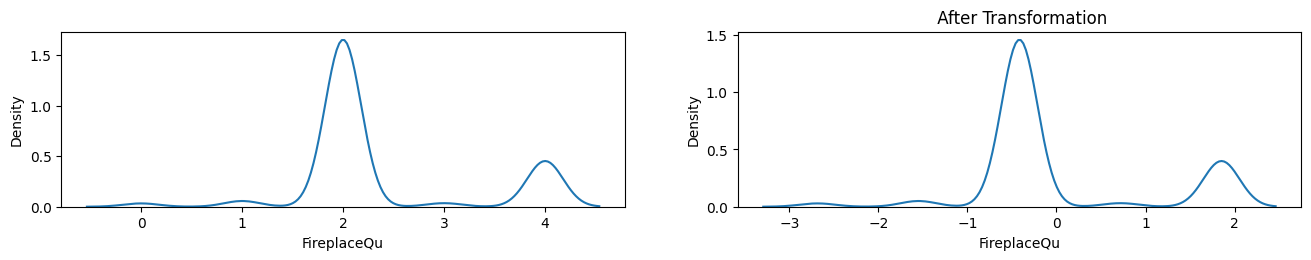

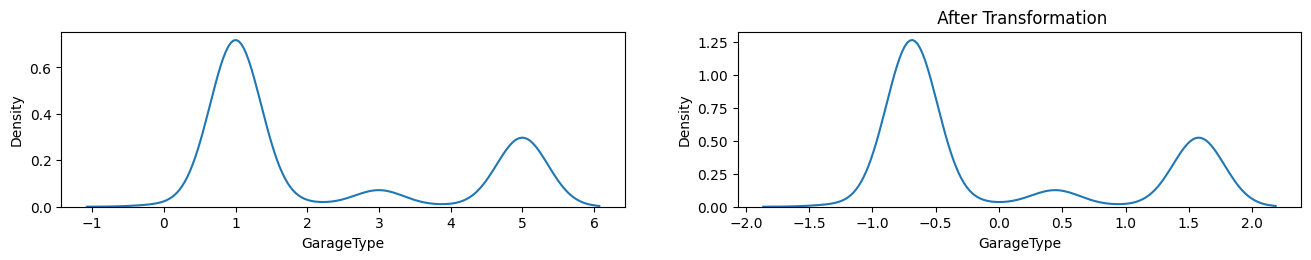

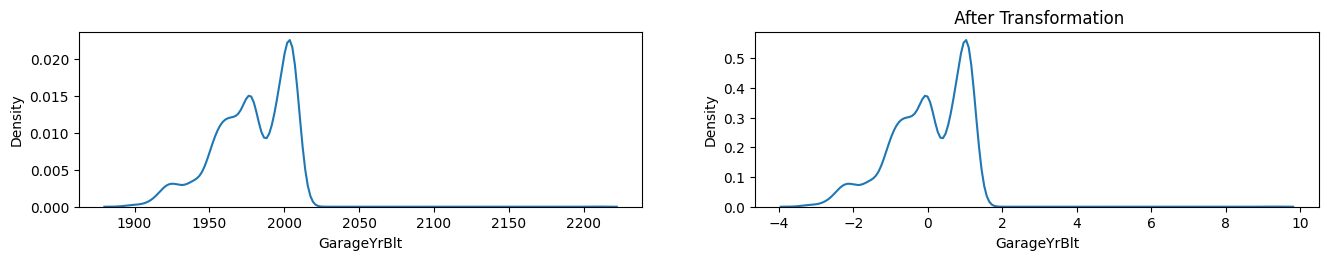

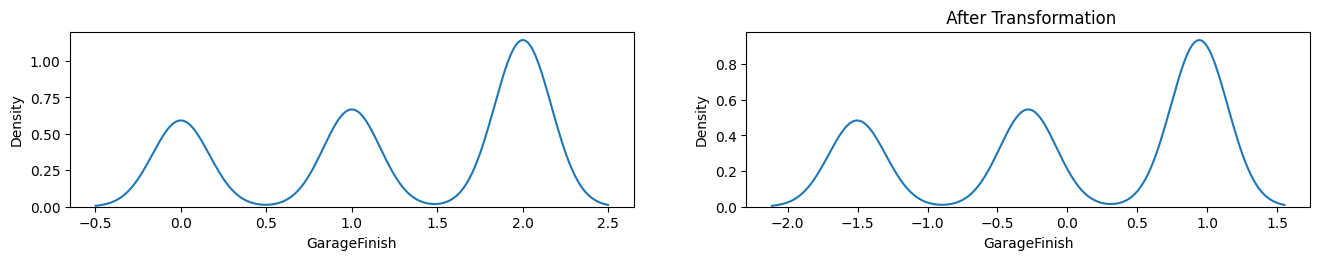

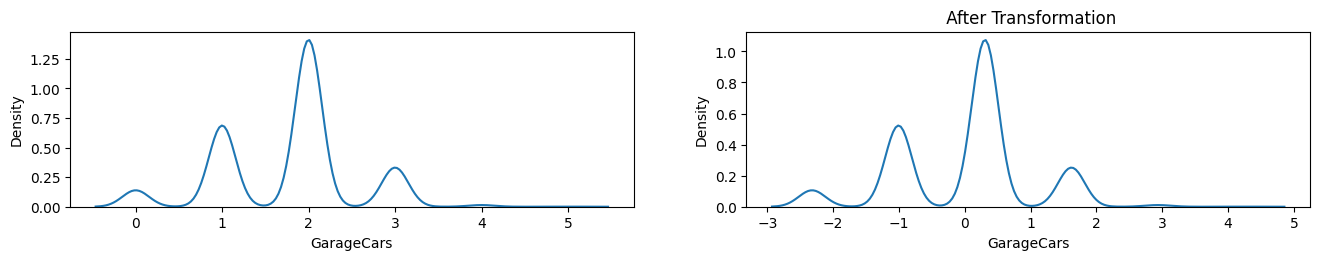

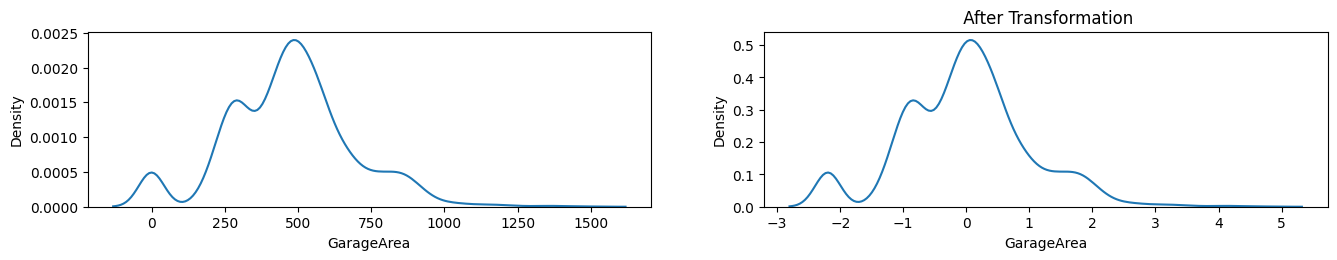

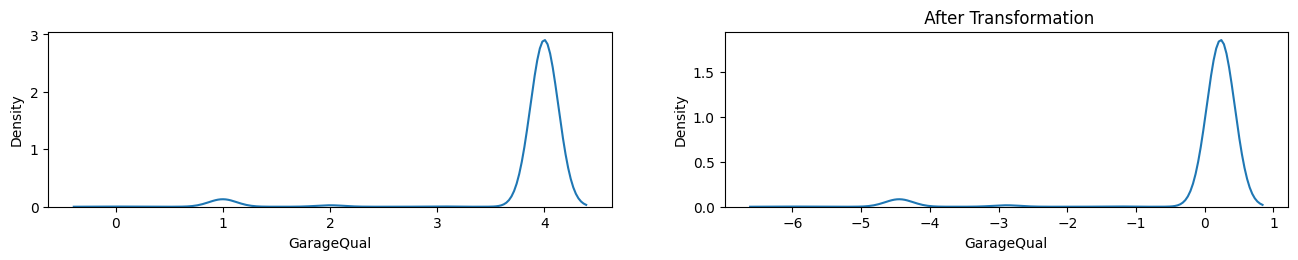

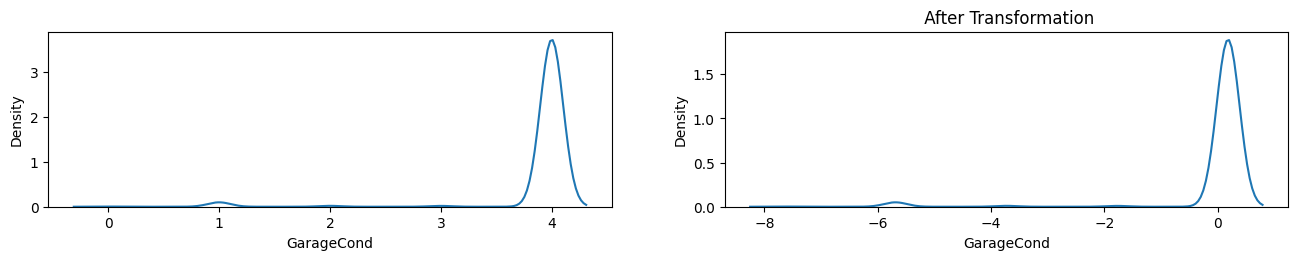

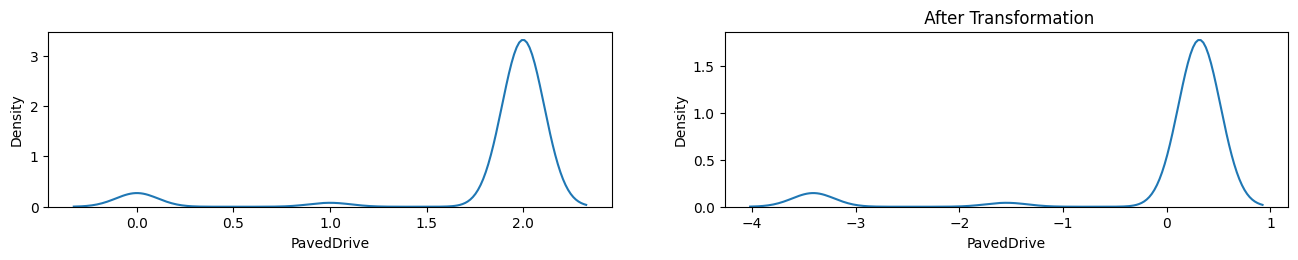

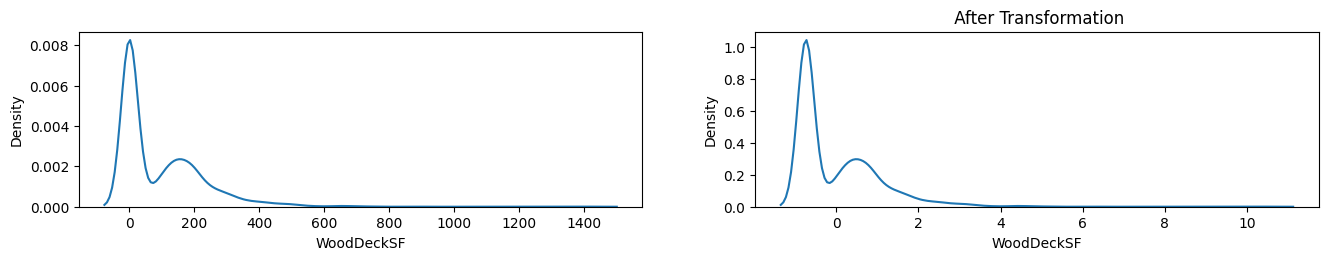

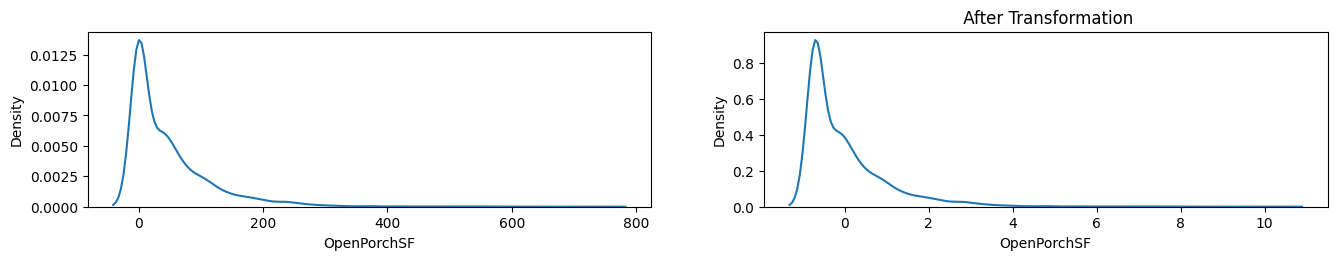

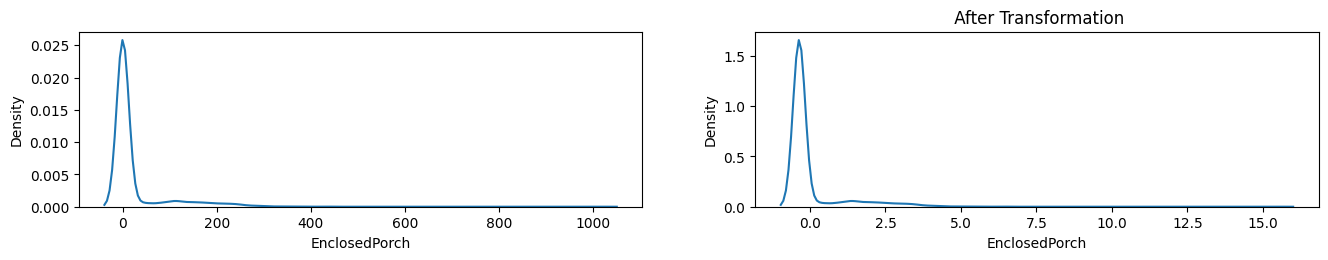

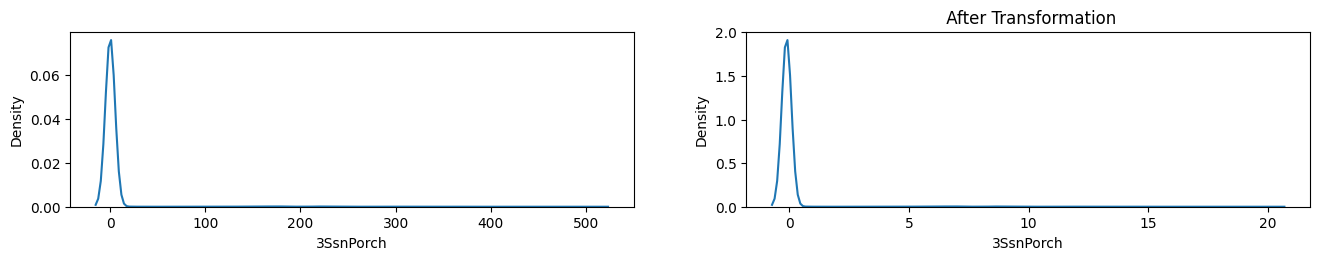

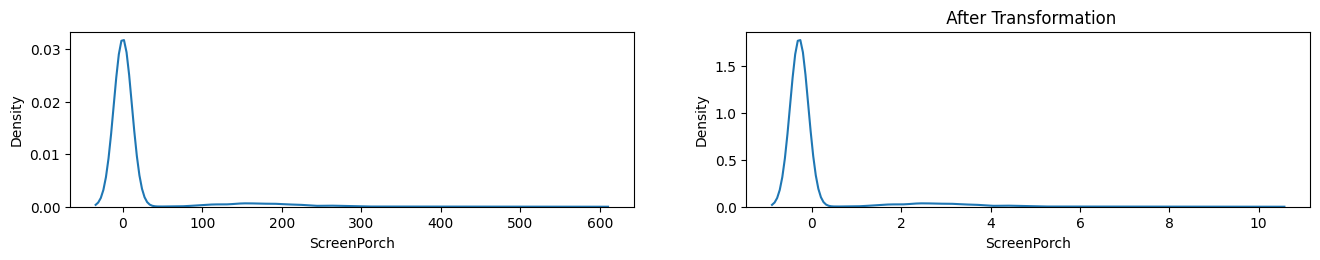

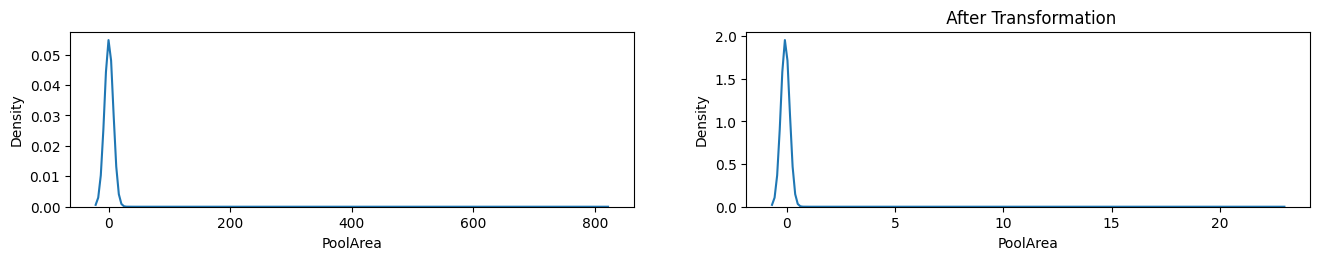

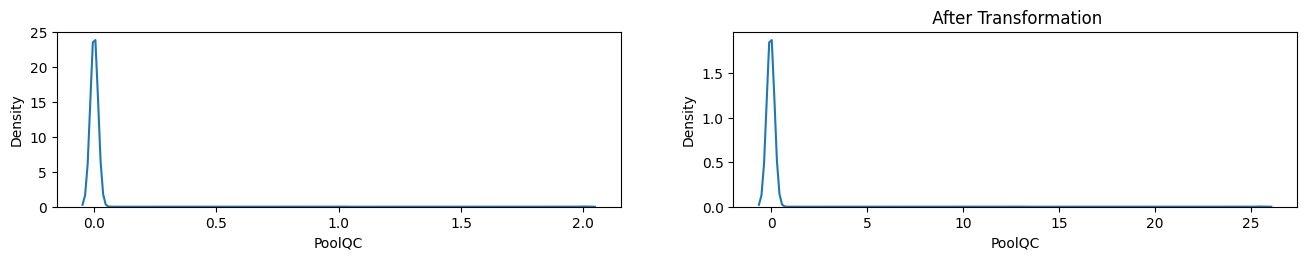

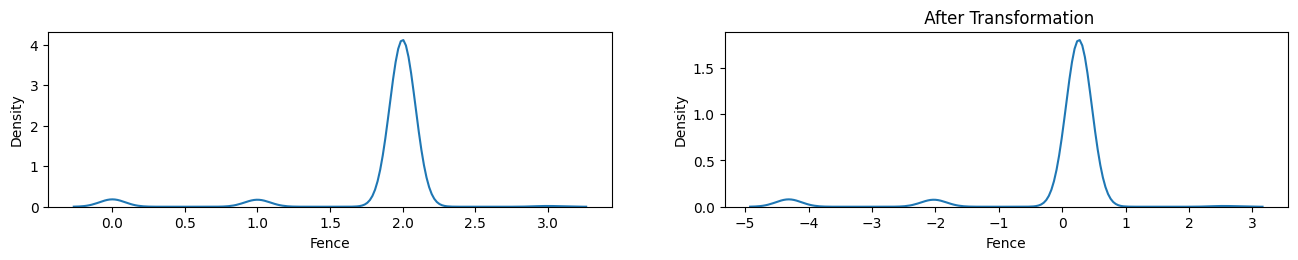

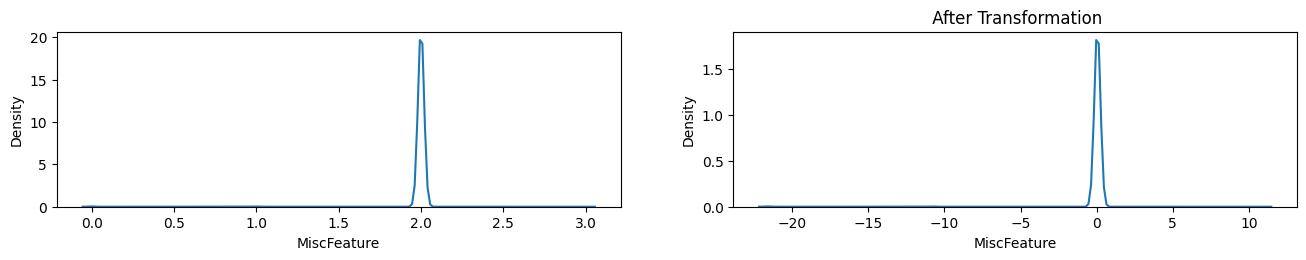

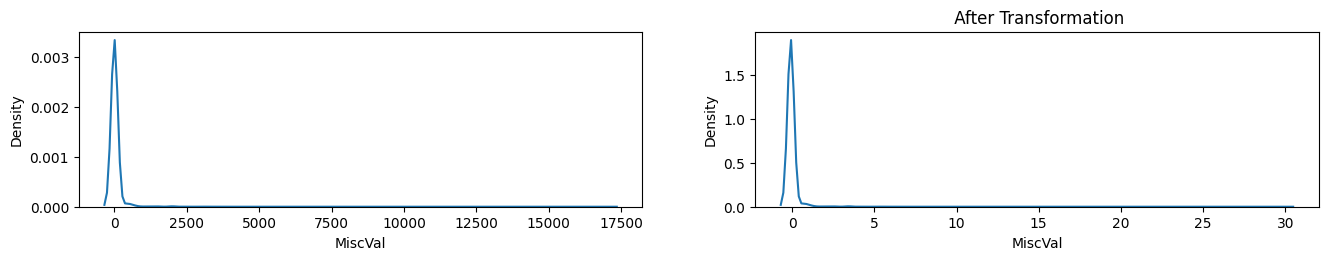

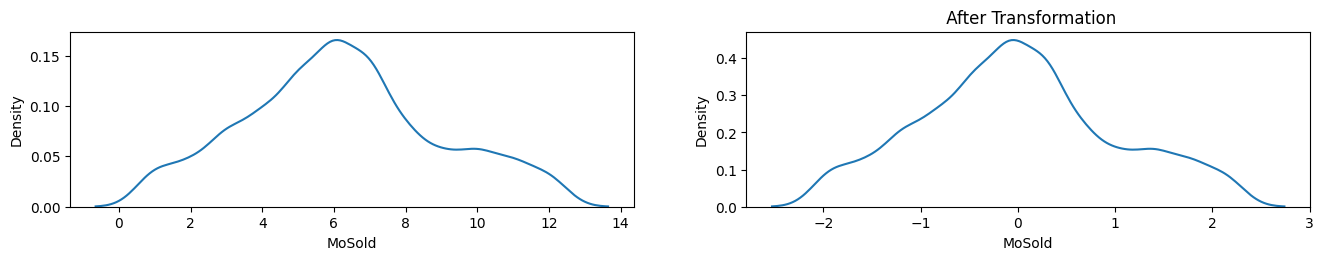

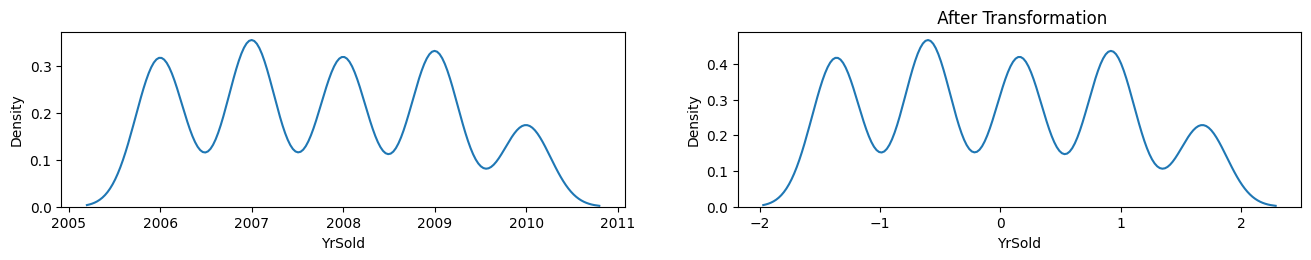

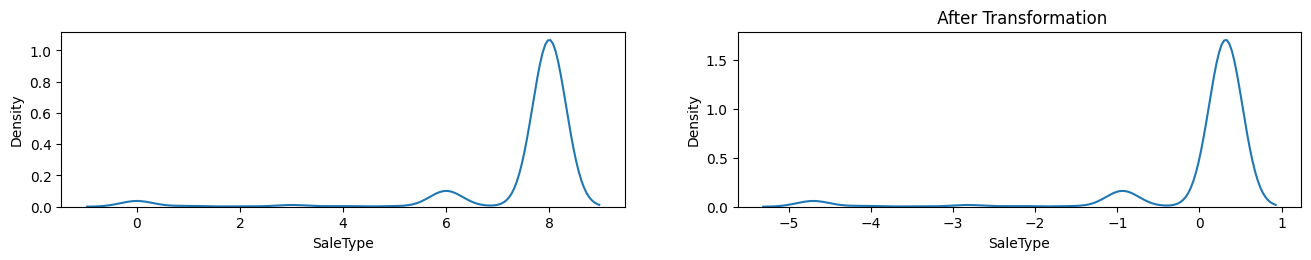

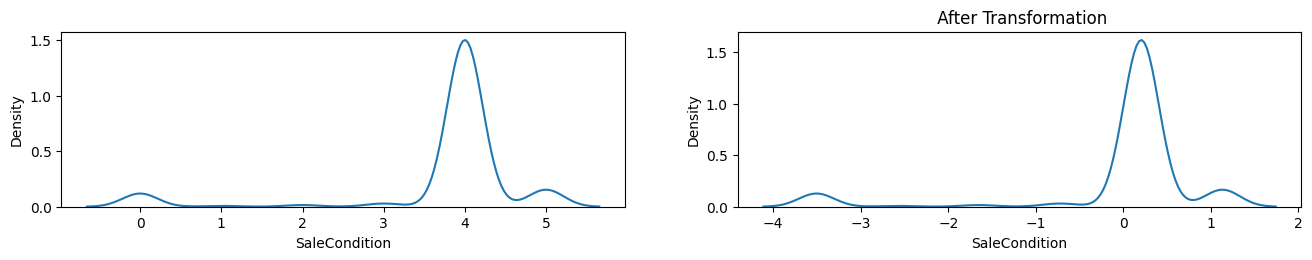

In [31]:
import warnings
warnings.filterwarnings('ignore') 

for i in x.columns:
    plt.figure(figsize=(16,5))


    plt.subplot(2,2,3)
    sns.kdeplot(x=x[i])
    plt.subplot(2,2,4)
    sns.kdeplot(x=x_scaler_frame[i])
    plt.title(' After Transformation')

    plt.show( )

In [32]:
x_scaler_frame.skew()

Id               1.558689e-16
MSSubClass       1.376165e+00
MSZoning        -1.752645e+00
LotFrontage      1.675713e+00
LotArea          1.282902e+01
                     ...     
MiscVal          2.195848e+01
MoSold           1.959847e-01
YrSold           1.324669e-01
SaleType        -3.729821e+00
SaleCondition   -2.789472e+00
Length: 80, dtype: float64

# 8. Splitting Train and Test data

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=2)

In [34]:
x.shape, x_train.shape, x_test.shape

((2919, 80), (2335, 80), (584, 80))

# 9. Model Implementation

In [35]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_test_pred_lr = lr.predict(x_test)
y_train_pred_lr = lr.predict(x_train)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_test_pred_rf = rf.predict(x_test)
y_train_pred_rf = rf.predict(x_train)

# XGBoost Regressor (replacing Gradient Boosting)
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
y_test_pred_xgb = xgb_model.predict(x_test)
y_train_pred_xgb = xgb_model.predict(x_train)

# 10. Evaluation

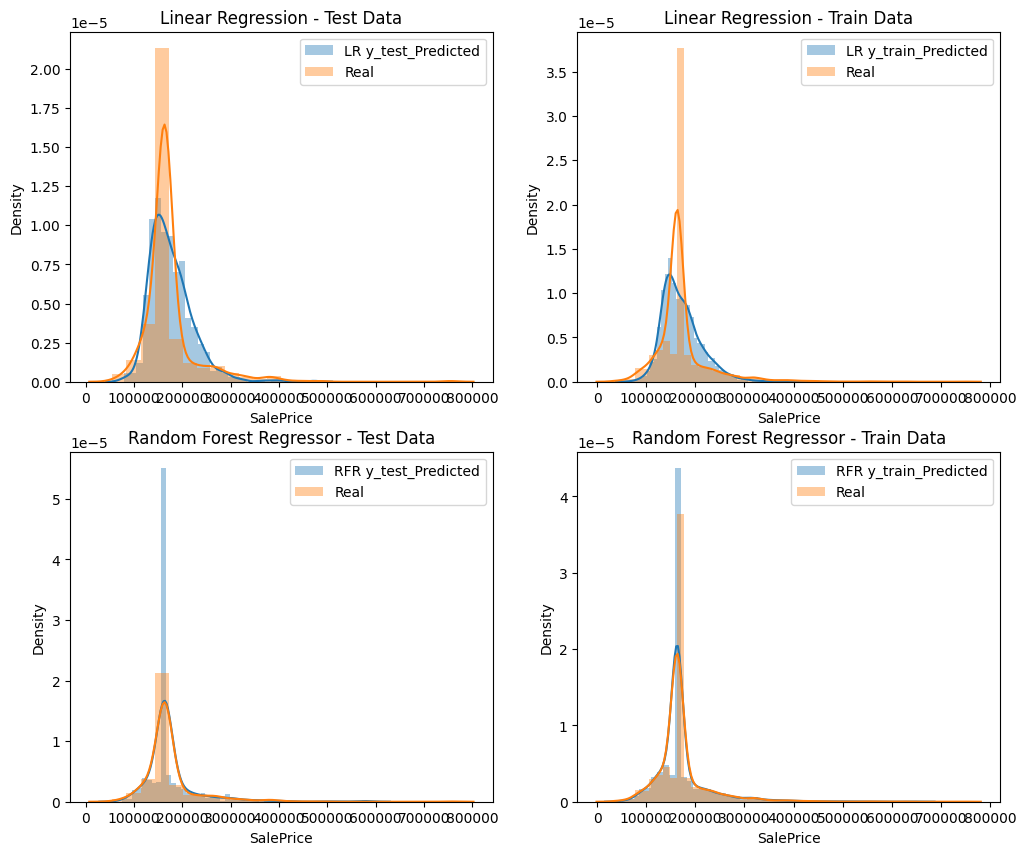

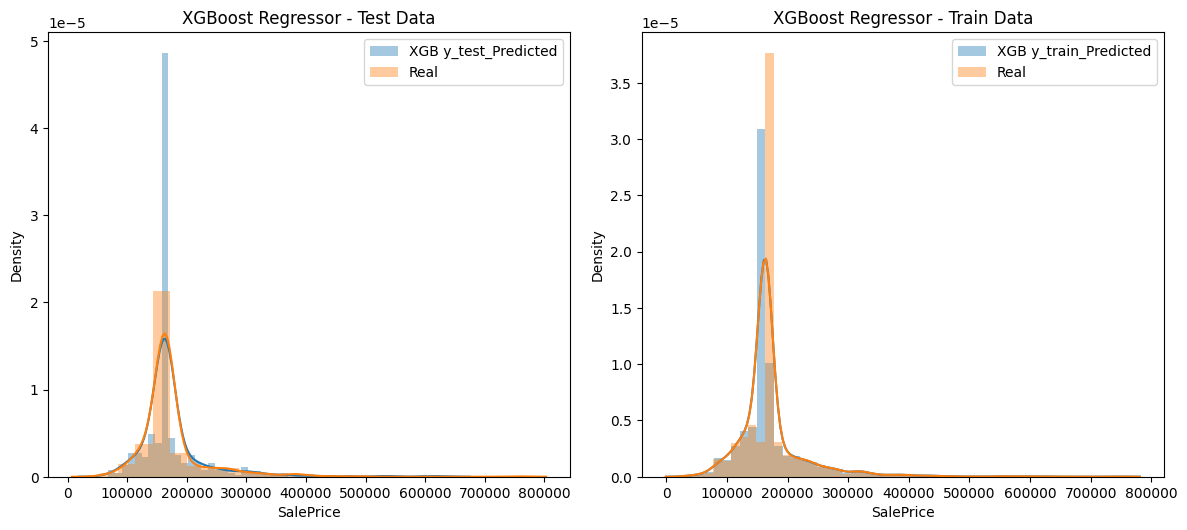

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
plt.figure(figsize=(12, 10))

# Linear Regression
plt.subplot(2, 2, 1)
sns.distplot(y_test_pred_lr, label="LR y_test_Predicted")
sns.distplot(y_test, label="Real")
plt.legend()
plt.title('Linear Regression - Test Data')

plt.subplot(2, 2, 2)
sns.distplot(y_train_pred_lr, label="LR y_train_Predicted")
sns.distplot(y_train, label="Real")
plt.legend()
plt.title('Linear Regression - Train Data')

# Random Forest Regressor
plt.subplot(2, 2, 3)
sns.distplot(y_test_pred_rf, label="RFR y_test_Predicted")
sns.distplot(y_test, label="Real")
plt.legend()
plt.title('Random Forest Regressor - Test Data')

plt.subplot(2, 2, 4)
sns.distplot(y_train_pred_rf, label="RFR y_train_Predicted")
sns.distplot(y_train, label="Real")
plt.legend()
plt.title('Random Forest Regressor - Train Data')

# XGBoost Regressor (replaced Gradient Boosting)
plt.figure(figsize=(12, 10))  # Start a new figure for XGB plots
plt.subplot(2, 2, 1)
sns.distplot(y_test_pred_xgb, label="XGB y_test_Predicted")
sns.distplot(y_test, label="Real")
plt.legend()
plt.title('XGBoost Regressor - Test Data')

plt.subplot(2, 2, 2)
sns.distplot(y_train_pred_xgb, label="XGB y_train_Predicted")
sns.distplot(y_train, label="Real")
plt.legend()
plt.title('XGBoost Regressor - Train Data')

# Display all plots
plt.tight_layout()
plt.show()

## Mean Absolute Error (MAE)

In [37]:
lr_mae = mean_absolute_error(y_test, y_test_pred_lr)
rf_mae = mean_absolute_error(y_test, y_test_pred_rf)
xgb_mae = mean_absolute_error(y_test, y_test_pred_xgb)

print(f"Linear Regression MAE: {lr_mae}")
print(f"Random Forest Regressor MAE: {rf_mae}")
print(f"XGBoost Regressor MAE: {xgb_mae}")

Linear Regression MAE: 31941.081804547477
Random Forest Regressor MAE: 9805.85243150685
XGBoost Regressor MAE: 10501.832526220034


## Mean Squared Error (MSE)

In [38]:
lr_mse = mean_squared_error(y_test, y_test_pred_lr)
rf_mse = mean_squared_error(y_test, y_test_pred_rf)
xgb_mse = mean_squared_error(y_test, y_test_pred_xgb)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Random Forest Regressor MSE: {rf_mse}")
print(f"XGBoost Regressor MSE: {xgb_mse}")

Linear Regression MSE: 2171794789.4429736
Random Forest Regressor MSE: 952831727.5495921
XGBoost Regressor MSE: 914402704.2282355


## Root Mean Squared Error (RMSE)

In [39]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
rf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Random Forest Regressor RMSE: {rf_rmse}")
print(f"XGBoost Regressor RMSE: {xgb_rmse}")

Linear Regression RMSE: 46602.5191319415
Random Forest Regressor RMSE: 30867.97252087659
XGBoost Regressor RMSE: 30239.092318193605


## R-Squared Score

In [40]:
from xgboost import XGBRegressor

lr_score = lr.score(x_test, y_test)
rf_score = rf.score(x_test, y_test)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)  # Make sure x_train and y_train are defined
xgb_score = xgb.score(x_test, y_test)

print(f"Linear Regression R-squared score: {lr_score}")
print(f"Random Forest Regressor R-squared score: {rf_score}")
print(f"XGBoost Regressor R-squared score: {xgb_score}")

Linear Regression R-squared score: 0.33233219536020997
Random Forest Regressor R-squared score: 0.7070740427149923
XGBoost Regressor R-squared score: 0.7188881522985235


# Comparison of the models

<Figure size 800x600 with 0 Axes>

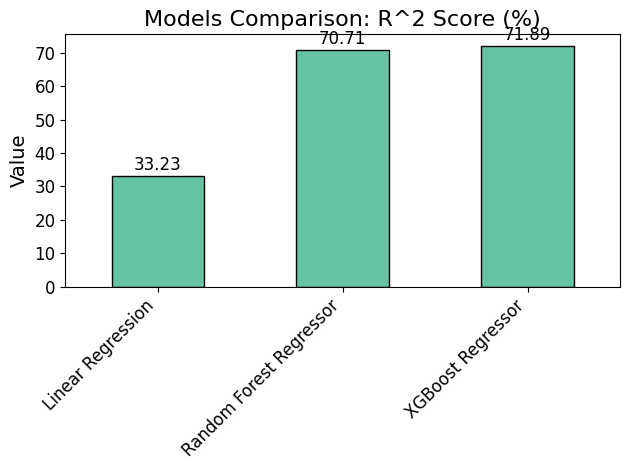

<Figure size 800x600 with 0 Axes>

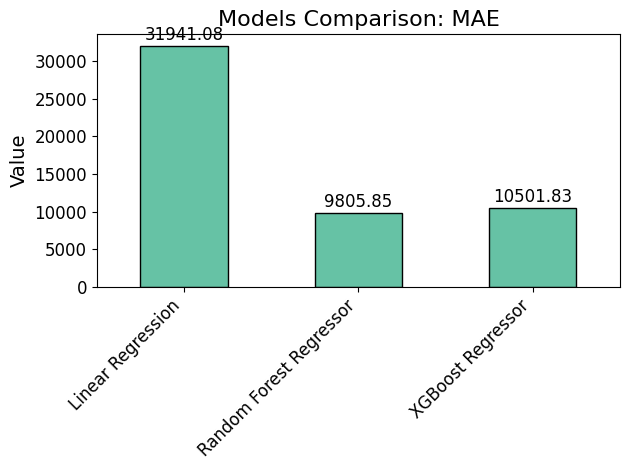

<Figure size 800x600 with 0 Axes>

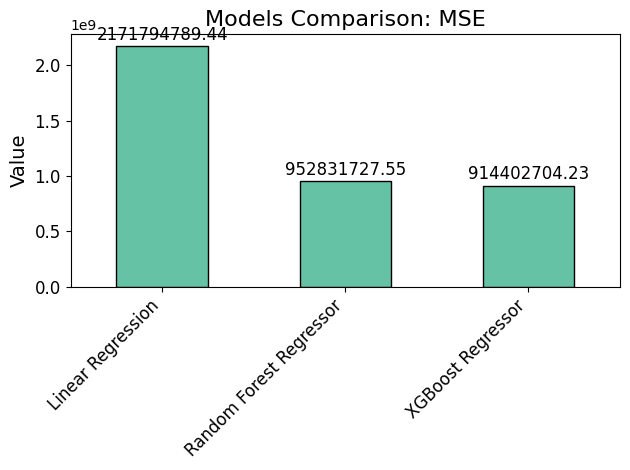

<Figure size 800x600 with 0 Axes>

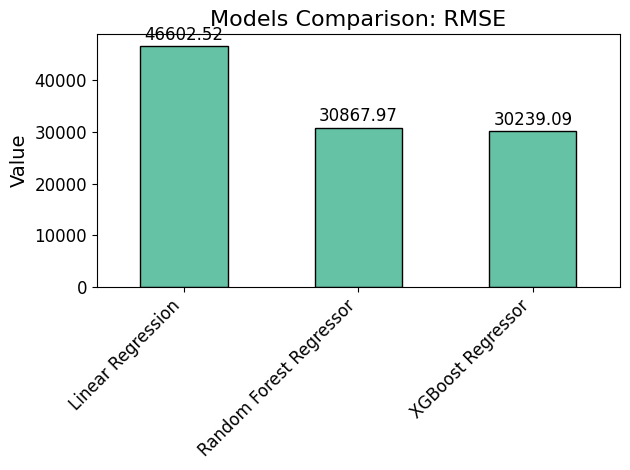

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert R^2 to percentage for better visualization
lr_score_percent = lr_score * 100
rf_score_percent = rf_score * 100
xgb_score_percent = xgb_score * 100

# Define the metrics and their values
metrics = ['R^2 Score (%)', 'MAE', 'MSE', 'RMSE']
lr_values = [lr_score_percent, lr_mae, lr_mse, lr_rmse]
rf_values = [rf_score_percent, rf_mae, rf_mse, rf_rmse]
xgb_values = [xgb_score_percent, xgb_mae, xgb_mse, xgb_rmse]

# Create a dictionary for easy iteration
model_scores = {
    'Linear Regression': lr_values,
    'Random Forest Regressor': rf_values,
    'XGBoost Regressor': xgb_values
}

# Create a DataFrame
comparison_df = pd.DataFrame(model_scores, index=metrics).reset_index()
comparison_df = comparison_df.rename(columns={'index': 'Metric'})

# Loop through each metric and plot separately
for metric in metrics:
    plt.figure(figsize=(8, 6))
    
    # Select the row corresponding to the metric
    metric_data = comparison_df[comparison_df['Metric'] == metric].set_index('Metric').T
    metric_data.columns = [metric]  # Rename the column for consistent access
    
    ax = metric_data.plot(kind='bar', 
                          legend=False, 
                          color=sns.color_palette("Set2"), 
                          edgecolor='black')
    
    # Annotate values on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black',
                    xytext=(0, 8), textcoords='offset points')

    plt.title(f'Models Comparison: {metric}', fontsize=16)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# 11. Hyperparameter optimization using Grid Search

In [42]:
# Define hyperparameters for Linear Regression
lr_params = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'copy_X': [True, False],  # Whether to copy X or overwrite it
    'n_jobs': [-1, None]  # Use all processors (-1) or default
}

# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Define hyperparameters for XGBoost 
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Analogous to max_features
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction to split
    'min_child_weight': [1, 2, 4],  # Similar to min_samples_leaf
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.1, 1],  # L2 regularization
    'n_jobs': [-1]  # Use all processors
}

## Performing Grid Search for Linear Regression

In [43]:
# Perform Grid Search for Linear Regression
lr_grid_search = GridSearchCV(estimator=LinearRegression(),
                              param_grid=lr_params, cv=5)
lr_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, None]})

In [44]:
lr_grid_search.cv_results_

{'mean_fit_time': array([0.0177124 , 0.01852112, 0.01578097, 0.0175746 , 0.01690269,
        0.02095757, 0.02043762, 0.01634798]),
 'std_fit_time': array([0.00405298, 0.00190768, 0.00242643, 0.00315233, 0.00046036,
        0.00394962, 0.00446821, 0.00181466]),
 'mean_score_time': array([0.00299439, 0.00128145, 0.00133681, 0.00178452, 0.00083094,
        0.00177345, 0.0018477 , 0.00139022]),
 'std_score_time': array([2.05906482e-03, 9.82430264e-04, 9.95134325e-04, 1.25279583e-03,
        6.93203813e-06, 1.12856657e-03, 1.32979210e-03, 1.17354301e-03]),
 'param_copy_X': masked_array(data=[True, True, True, True, False, False, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_fit_intercept': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),

In [45]:
tuning_result_lr_gs = pd.DataFrame(lr_grid_search.cv_results_)
tuning_result_lr_gs.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_copy_X  \
0       0.017712      0.004053         0.002994        0.002059         True   
1       0.018521      0.001908         0.001281        0.000982         True   
2       0.015781      0.002426         0.001337        0.000995         True   
3       0.017575      0.003152         0.001785        0.001253         True   
4       0.016903      0.000460         0.000831        0.000007        False   

  param_fit_intercept param_n_jobs  \
0                True           -1   
1                True         None   
2               False           -1   
3               False         None   
4                True           -1   

                                              params  split0_test_score  \
0  {'copy_X': True, 'fit_intercept': True, 'n_job...      -1.565383e+25   
1  {'copy_X': True, 'fit_intercept': True, 'n_job...      -1.565383e+25   
2  {'copy_X': True, 'fit_intercept': False, 'n_jo...      -1.532448e+05   
3  {'copy_X': True, 'fit_intercept': False, 'n_jo...      -1.532448e+05   
4  {'copy_X': False, 'fit_intercept': True, 'n_jo...      -1.565383e+25   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.412451           0.438470      -1.110455e+19           0.437475   
1           0.412451           0.438470      -1.110455e+19           0.437475   
2          -8.985564         -10.241429      -1.879377e+05          -9.326516   
3          -8.985564         -10.241429      -1.879377e+05          -9.326516   
4           0.412451           0.438470      -1.110455e+19           0.437475   

   mean_test_score  std_test_score  rank_test_score  
0    -3.130768e+24    6.261530e+24                5  
1    -3.130768e+24    6.261530e+24                5  
2    -6.824221e+04    8.428469e+04                1  
3    -6.824221e+04    8.428469e+04                1  
4    -3.130768e+24    6.261530e+24                5

In [46]:
tuning_result_lr_gs.shape

(8, 16)

In [47]:
lr_grid_search.best_params_ #clf = lr_grid_search.best_params_

{'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}

In [64]:
y_pred_lr_gs = lr_grid_search.predict(x_test)
lr_mae_gs = mean_absolute_error(y_test, y_pred_lr_gs)
lr_msc_gs = mean_squared_error(y_test, y_pred_lr_gs)
lr_rmse_gs = (lr_msc_gs) ** 0.5  # <-- Added this line
lr_score_gs = r2_score(y_test, y_pred_lr_gs)

print("\nLinear Regression Grid Search Performance:")
print("Mean Absolute Error:", lr_mae_gs)
print("Mean Squared Error:", lr_msc_gs)
print("Root Mean Squared Error:", lr_rmse_gs)  # <-- Added this line
print("R-squared:", lr_score_gs)


Linear Regression Grid Search Performance:
Mean Absolute Error: 173903.40753424657
Mean Squared Error: 32408236783.00685
Root Mean Squared Error: 180022.8784988365
R-squared: -8.963158770956632


## Performing Grid Search for Random Forest

In [49]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [50]:
# 2. Random Forest (avoid 'auto' in max_features)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'max_features': [1.0, 'sqrt', 'log2'],  # No 'auto'
    'bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    n_jobs=-1,
    verbose=2
)
rf_grid_search.fit(x_train, y_train)
y_pred_rf_gs = rf_grid_search.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_split=5, n_estimators=200; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.2s

In [51]:
rf_grid_search.cv_results_

{'mean_fit_time': array([2.52782512, 5.122789  , 2.22775292, 4.61653452, 0.60023012,
        1.28437696, 0.70559335, 1.09218349, 0.52339892, 1.05492926,
        0.50642586, 0.93860331, 2.02596922, 4.07156119, 1.97118449,
        3.86875701, 0.46183934, 0.9320869 , 0.44855247, 0.92177062,
        0.40918474, 0.79548955, 0.40052667, 0.77868295, 2.59984126,
        5.43645611, 2.19817915, 4.44330854, 0.59016848, 1.18268428,
        0.54443841, 1.07019262, 0.52655802, 1.03656301, 0.46400461,
        0.94085884, 3.80547042, 8.00210266, 3.32442107, 6.68313808,
        0.76676159, 1.54198861, 0.68545341, 1.34889183, 0.65435252,
        1.33084669, 0.58004274, 1.13836155, 3.01482587, 6.05535469,
        2.82435393, 5.56078811, 0.53224106, 1.08891296, 0.52001514,
        1.0230372 , 0.44729571, 0.88855338, 0.44392128, 0.85928488,
        3.82637644, 7.96594791, 3.33211923, 6.68992858, 0.75567007,
        1.50748477, 0.6770833 , 1.35981755, 0.66344585, 1.28146505,
        0.56387801, 1.06407771]

In [52]:
tuning_result_rf_gs = pd.DataFrame(rf_grid_search.cv_results_)
tuning_result_rf_gs.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.527825      0.053997         0.011329        0.000765   
1       5.122789      0.101067         0.021388        0.001302   
2       2.227753      0.063913         0.009223        0.000198   
3       4.616535      0.386072         0.017369        0.000418   
4       0.600230      0.008996         0.013008        0.000330   

  param_bootstrap param_max_depth param_max_features param_min_samples_split  \
0            True            None                1.0                       2   
1            True            None                1.0                       2   
2            True            None                1.0                       5   
3            True            None                1.0                       5   
4            True            None               sqrt                       2   

  param_n_estimators                                             params  \
0                100  {'bootstrap': True, 'max_depth': None, 'max_fe...   
1                200  {'bootstrap': True, 'max_depth': None, 'max_fe...   
2                100  {'bootstrap': True, 'max_depth': None, 'max_fe...   
3                200  {'bootstrap': True, 'max_depth': None, 'max_fe...   
4                100  {'bootstrap': True, 'max_depth': None, 'max_fe...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.869795           0.845357           0.894040           0.896137   
1           0.872886           0.845037           0.894844           0.893096   
2           0.871199           0.843213           0.891408           0.896919   
3           0.873659           0.842791           0.893734           0.895180   
4           0.718146           0.759364           0.768975           0.723059   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.898174         0.880701        0.020443                3  
1           0.895072         0.880187        0.019452                4  
2           0.894546         0.879457        0.020284                8  
3           0.892169         0.879506        0.019953                7  
4           0.766573         0.747223        0.022020               22

In [53]:
tuning_result_rf_gs.shape

(72, 18)

In [54]:
rf_grid_search.best_params_ #clf = rf_grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 1.0,
 'min_samples_split': 2,
 'n_estimators': 100}

In [63]:
y_pred_rf_gs = rf_grid_search.predict(x_test)
rf_mae_gs = mean_absolute_error(y_test, y_pred_rf_gs)
rf_msc_gs = mean_squared_error(y_test, y_pred_rf_gs)
rf_rmse_gs = (rf_msc_gs) ** 0.5  # <-- Added this line
rf_score_gs = r2_score(y_test, y_pred_rf_gs)

print("\nRandom Forest Grid Search Performance:")
print("Mean Absolute Error:", rf_mae_gs)
print("Mean Squared Error:", rf_msc_gs)
print("Root Mean Squared Error:", rf_rmse_gs)  # <-- Added this line
print("R-squared:", rf_score_gs)


Random Forest Grid Search Performance:
Mean Absolute Error: 10030.89463466307
Mean Squared Error: 971349187.5328797
Root Mean Squared Error: 31166.475378728337
R-squared: 0.7013812802520536


## Performing Grid Search for XGBoost

In [56]:
# 3. XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3]
}
xgb_grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
    param_grid=xgb_params,
    cv=5,
    n_jobs=-1,
    verbose=2
)
xgb_grid_search.fit(x_train, y_train)
y_pred_xgb_gs = xgb_grid_search.predict(x_test)

Fitting 5 folds for each of 192 candidates, totalling 960 fits

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100; total time=   0.5s


In [57]:
xgb_grid_search.cv_results_

{'mean_fit_time': array([0.23245764, 0.18302178, 0.30690441, 0.30223093, 0.17175455,
        0.17646332, 0.29486241, 0.29746332, 0.44002843, 0.40460935,
        0.73276339, 0.72127275, 0.3668303 , 0.38066735, 0.63228874,
        0.6692543 , 0.95063248, 0.95871267, 1.6327189 , 1.65879059,
        0.77093129, 0.80692878, 1.2067081 , 1.22129092, 0.16722307,
        0.16511159, 0.30425425, 0.30007668, 0.15940948, 0.16132812,
        0.29123416, 0.28925672, 0.38028121, 0.4159071 , 0.72489181,
        0.72485085, 0.32480698, 0.34634352, 0.61221356, 0.62567263,
        0.82468486, 0.84568205, 2.00409827, 1.78643804, 0.5947814 ,
        0.63400435, 1.05398178, 1.13398247, 0.17776093, 0.17322569,
        0.30509081, 0.3054677 , 0.16933208, 0.17099128, 0.2917953 ,
        0.29647064, 0.40026612, 0.39832487, 0.73904872, 0.75131583,
        0.3653336 , 0.38139591, 0.62583609, 0.67268968, 0.95336905,
        0.99634242, 1.60698171, 1.61782594, 0.78620586, 0.81750379,
        1.21997852, 1.20550232,

In [58]:
tuning_result_xgb_gs = pd.DataFrame(xgb_grid_search.cv_results_)
tuning_result_xgb_gs.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.232458      0.054667         0.003607        0.001906   
1       0.183022      0.017170         0.002568        0.000048   
2       0.306904      0.004634         0.003228        0.000080   
3       0.302231      0.007034         0.003212        0.000106   
4       0.171755      0.004026         0.002691        0.000184   

  param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
0                    0.8           0                0.05               3   
1                    0.8           0                0.05               3   
2                    0.8           0                0.05               3   
3                    0.8           0                0.05               3   
4                    0.8           0                0.05               3   

  param_min_child_weight param_n_estimators param_subsample  \
0                      1                100             0.8   
1                      1                100             1.0   
2                      1                200             0.8   
3                      1                200             1.0   
4                      3                100             0.8   

                                              params  split0_test_score  \
0  {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...           0.839848   
1  {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...           0.853684   
2  {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...           0.865214   
3  {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...           0.876677   
4  {'colsample_bytree': 0.8, 'gamma': 0, 'learnin...           0.850340   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.848860           0.856180           0.857209           0.863301   
1           0.848367           0.871064           0.858385           0.860401   
2           0.873887           0.875359           0.886249           0.888338   
3           0.873151           0.890362           0.884136           0.886906   
4           0.846222           0.852929           0.855962           0.869957   

   mean_test_score  std_test_score  rank_test_score  
0         0.853079        0.008050              191  
1         0.858380        0.007580              187  
2         0.877809        0.008510              153  
3         0.882247        0.006401              133  
4         0.855082        0.008095              189

In [59]:
tuning_result_xgb_gs.shape

(192, 20)

In [60]:
xgb_grid_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 0.8}

In [65]:
y_pred_xgb_gs = xgb_grid_search.predict(x_test)

# Calculate evaluation metrics
xgb_mae_gs = mean_absolute_error(y_test, y_pred_xgb_gs)
xgb_msc_gs = mean_squared_error(y_test, y_pred_xgb_gs)
xgb_rmse_gs = (xgb_msc_gs) ** 0.5  # <-- Added this line
xgb_score_gs = r2_score(y_test, y_pred_xgb_gs)

print("\nXGBoost Grid Search Performance:")
print("Mean Absolute Error:", xgb_mae_gs)
print("Mean Squared Error:", xgb_msc_gs)
print("Root Mean Squared Error:", xgb_rmse_gs)  # <-- Added this line
print("R-squared:", xgb_score_gs)


XGBoost Grid Search Performance:
Mean Absolute Error: 9612.449472923801
Mean Squared Error: 962860087.247011
Root Mean Squared Error: 31029.986903751844
R-squared: 0.7039910567276141

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=3, min_ch

# Final comparison after Grid Search Optimization

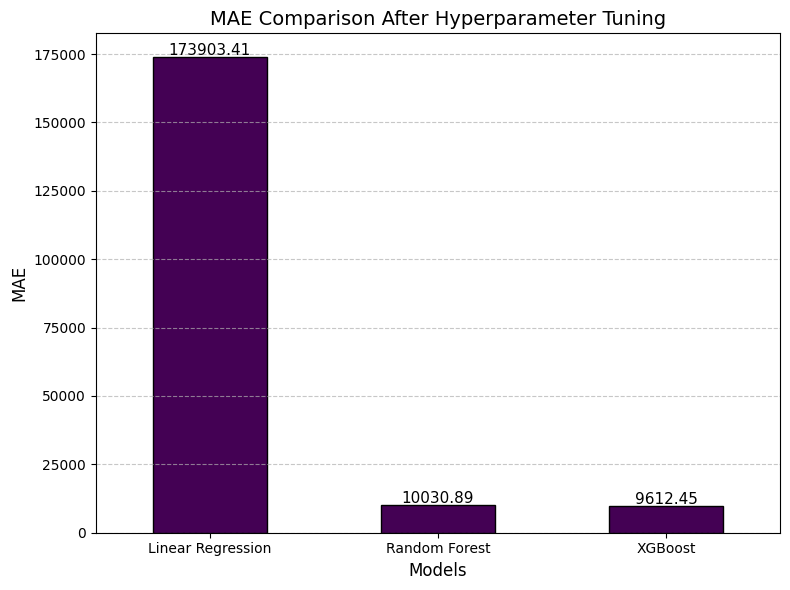

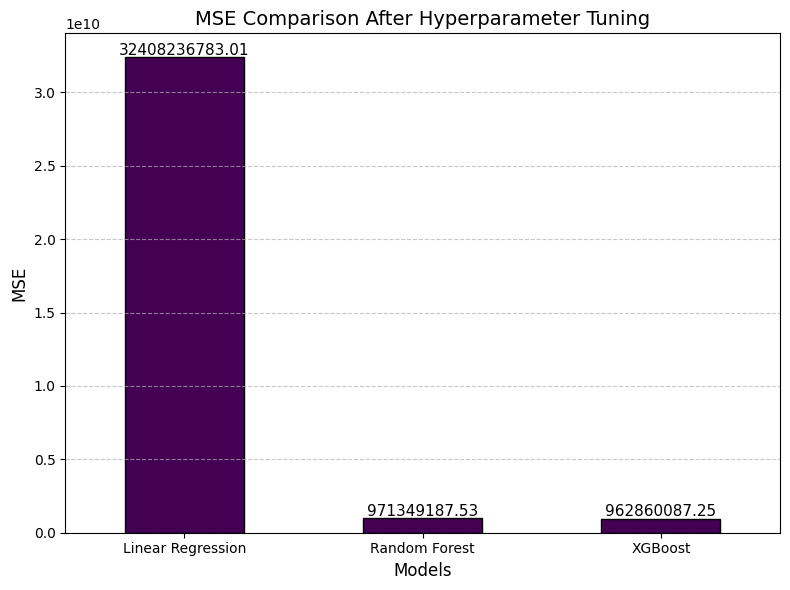

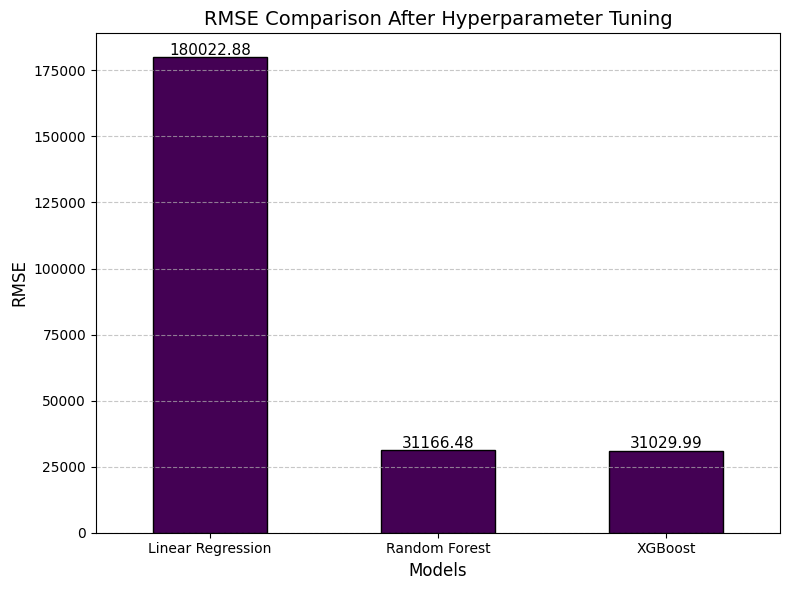

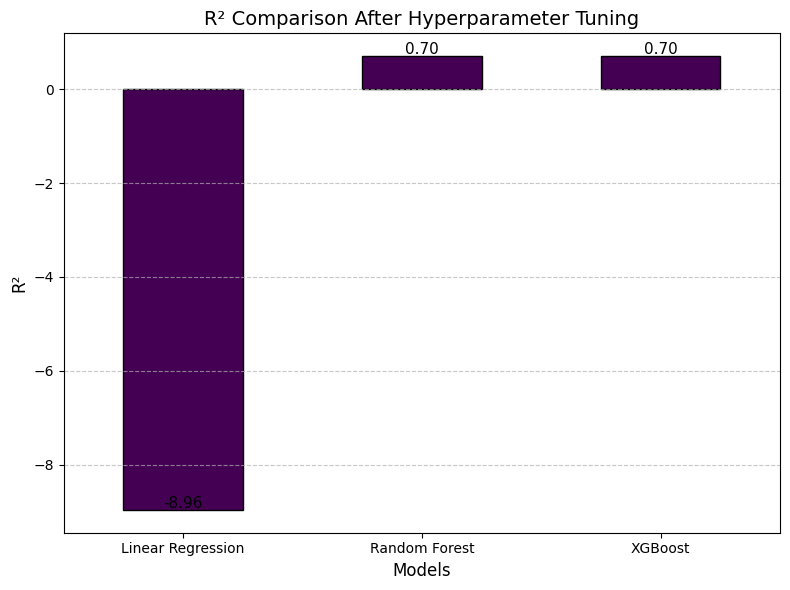

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Store model names
models = ["Linear Regression", "Random Forest", "XGBoost"]

# Compute metrics using predictions from the tuned models
metrics = {
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr_gs),
        mean_absolute_error(y_test, y_pred_rf_gs),
        mean_absolute_error(y_test, y_pred_xgb_gs)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr_gs),
        mean_squared_error(y_test, y_pred_rf_gs),
        mean_squared_error(y_test, y_pred_xgb_gs)
    ],
    "RMSE": [
        mean_squared_error(y_test, y_pred_lr_gs, squared=False),
        mean_squared_error(y_test, y_pred_rf_gs, squared=False),
        mean_squared_error(y_test, y_pred_xgb_gs, squared=False)
    ],
    "R²": [
        r2_score(y_test, y_pred_lr_gs),
        r2_score(y_test, y_pred_rf_gs),
        r2_score(y_test, y_pred_xgb_gs)
    ]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics, index=models)

# Plot bar charts separately for each metric
for metric in df_metrics.columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    df_metrics[[metric]].plot(kind="bar", colormap="viridis", edgecolor="black", ax=ax, legend=False)

    # Title and labels
    plt.title(f"{metric} Comparison After Hyperparameter Tuning", fontsize=14)
    plt.xlabel("Models", fontsize=12)
    plt.ylabel(metric, fontsize=12)

    # Set grid, x-tick rotation
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show metric values on the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 5), textcoords='offset points', 
                    ha='center', va='center', fontsize=11)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()